## Introduction

#### Build a Machine Learning model to identify the habitability score of the property based on the property's basic information and location-based information.

### Import the necessary packages.

In [ ]:
!pip install -q klib

     |████████████████████████████████| 133 kB 4.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
import klib

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/Hackerearth_get-a-room-ml-hackathon/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/Hackerearth_get-a-room-ml-hackathon/test.csv")

### Change column names in train and test dataset to lowercase.

In [ ]:
train=train.rename(columns={col:col.lower()   for col in train.columns.values})
test=test.rename(columns={col:col.lower()  for col in test.columns.values})

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             39499 non-null  object 
 1   property_type           39499 non-null  object 
 2   property_area           39499 non-null  int64  
 3   number_of_windows       37845 non-null  float64
 4   number_of_doors         39499 non-null  int64  
 5   furnishing              38457 non-null  object 
 6   frequency_of_powercuts  38116 non-null  float64
 7   power_backup            39499 non-null  object 
 8   water_supply            39499 non-null  object 
 9   traffic_density_score   39499 non-null  float64
 10  crime_rate              38712 non-null  object 
 11  dust_and_noise          38280 non-null  object 
 12  air_quality_index       39499 non-null  float64
 13  neighborhood_review     39499 non-null  float64
 14  habitability_score      39499 non-null

#### The above information shows that there are 39499 data entries and 15 columns.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             10500 non-null  object 
 1   property_type           10500 non-null  object 
 2   property_area           10500 non-null  int64  
 3   number_of_windows       10055 non-null  float64
 4   number_of_doors         10500 non-null  int64  
 5   furnishing              10243 non-null  object 
 6   frequency_of_powercuts  10134 non-null  float64
 7   power_backup            10500 non-null  object 
 8   water_supply            10500 non-null  object 
 9   traffic_density_score   10500 non-null  float64
 10  crime_rate              10288 non-null  object 
 11  dust_and_noise          10170 non-null  object 
 12  air_quality_index       10500 non-null  float64
 13  neighborhood_review     10500 non-null  float64
dtypes: float64(5), int64(2), object(7)
mem

#### The above information shows that there are 10500 data entries and 14 columns.

#### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

property_id                  0
property_type                0
property_area                0
number_of_windows         1654
number_of_doors              0
furnishing                1042
frequency_of_powercuts    1383
power_backup                 0
water_supply                 0
traffic_density_score        0
crime_rate                 787
dust_and_noise            1219
air_quality_index            0
neighborhood_review          0
habitability_score           0
dtype: int64

In [ ]:
train.columns[train.isnull().any()]

Index(['number_of_windows', 'furnishing', 'frequency_of_powercuts',
       'crime_rate', 'dust_and_noise'],
      dtype='object')

#### The above information shows that there are missing columns number of windows, furnishing, frequency of powercut, crime_rate, and dust_and_noise.

In [ ]:
test.isnull().sum()

property_id                 0
property_type               0
property_area               0
number_of_windows         445
number_of_doors             0
furnishing                257
frequency_of_powercuts    366
power_backup                0
water_supply                0
traffic_density_score       0
crime_rate                212
dust_and_noise            330
air_quality_index           0
neighborhood_review         0
dtype: int64

In [ ]:
test.columns[test.isnull().any()]

Index(['number_of_windows', 'furnishing', 'frequency_of_powercuts',
       'crime_rate', 'dust_and_noise'],
      dtype='object')

#### The above information shows that there are missing columns number of windows, furnishing, frequency of powercut, crime_rate, and dust_and_noise.

#### Let's see the glimpse of train dataset

In [ ]:
train.head(2)

,property_id,property_type,property_area,number_of_windows,number_of_doors,furnishing,frequency_of_powercuts,power_backup,water_supply,traffic_density_score,crime_rate,dust_and_noise,air_quality_index,neighborhood_review,habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20


### Let's create a function to display the catgeorical column level counts.

In [ ]:
def count_plot(df,col,rot=None,switchax=None,size=(8,6),title=''):
  _=plt.figure(figsize=size)
  if switchax:
     _=sns.countplot(y=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.ylabel(col,fontsize=20)
     _=plt.yticks(fontsize=14,rotation=rot)   
  
  else:
     _=sns.countplot(x=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.xlabel(col,fontsize=20)
     _=plt.xticks(fontsize=14,rotation=rot)   
  

### Let's create a function to display the group by catgeorical column level counts.

In [ ]:
def grp_count_plot(df,col,grp,rot=None,switchax=None,size=(10,8),title=''):
  _=plt.figure(figsize=size)
  if switchax:
    g=sns.countplot(y=df[col],hue=df[grp],order=df[col].value_counts().index );
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    _=plt.title(title,fontsize=25)
    _=plt.ylabel(col.capitalize(),fontsize=20)
    _=plt.yticks(fontsize=14,rotation=rot)
  else:
    g=sns.countplot(x=df[col],hue=df[grp],order=df[col].value_counts().index );
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    _=plt.title(title,fontsize=25)
    _=plt.xlabel(col.capitalize(),fontsize=20)
    _=plt.xticks(fontsize=14,rotation=rot)

 

### Let's create a function for box plot.

In [ ]:
def box_plot(df,col,rot=None):
  _=plt.figure(figsize=(8,6))
  _=sns.boxplot(y=df[col])
  _=plt.title(col.capitalize()+" Distribution",fontsize=25)
  _=plt.ylabel(col,fontsize=20,rotation=rot)
  _=plt.yticks(fontsize=14)


### Let's create a function for side by side plot(density and group-wise boxplot).

In [ ]:
def side_by_side_plot(df,grp,valcol,rot=None):
  clr="Paired"
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
  fig.tight_layout()
  sns.kdeplot(x=df[valcol], hue=df[grp],ax=ax1,palette=clr)
  ax1.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax1.set_xlabel(valcol,fontsize=20)
  sns.boxplot(x=df[grp],y=df[valcol],ax=ax2,palette=clr)
  ax2.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax2.set_xlabel(grp,fontsize=20)
  ax2.tick_params(rotation=rot)

### Let's create a function for group by numerical summary.

In [ ]:
def group_summary(df,groupcol,value):
    return df.groupby(groupcol)[value].describe().reset_index().sort_values('mean',ascending=False)

In [ ]:
def group_by_perc(df,grp,target,sortby='percentage',sort=False):
  return df.groupby([grp,target])[target].agg({'count'}).reset_index().assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).sort_values(sortby,ascending=sort)

### Let's see the property's habitability score column distribution.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


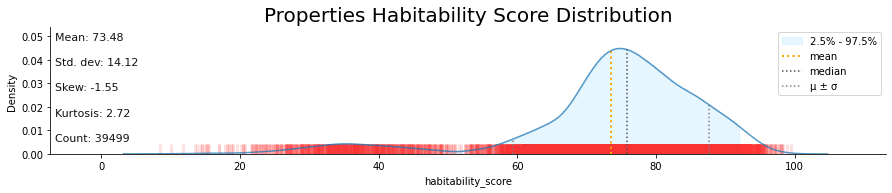

In [ ]:
klib.dist_plot(train['habitability_score']);
plt.title("Properties Habitability Score Distribution",fontsize=20);

In [ ]:
train['habitability_score'].describe()

count    39499.000000
mean        73.482297
std         14.118753
min          7.280000
25%         69.660000
50%         75.760000
75%         82.260000
max        100.000000
Name: habitability_score, dtype: float64

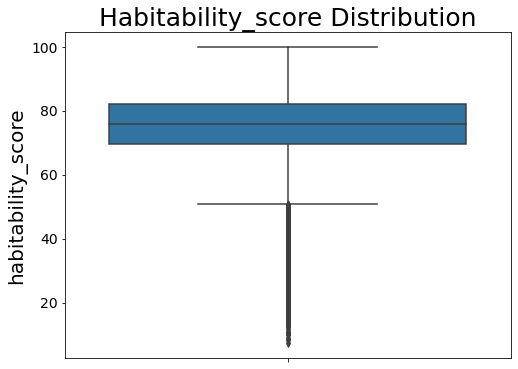

In [ ]:
box_plot(train,'habitability_score',rot=90)

#### The above histogram explains that the habitability score column is negatively skewed(mean<median).

### The habitability score ranges from 7.2 to 100.

### The average habitability score is 73.5.

#### The boxplot explains that there are outliers below the first quartile.

### Let's see various types of property and see their habitability score distribution.

In [ ]:
train['property_type'].value_counts()

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: property_type, dtype: int64

#### The property type column contains some meaning fewer values. So let's replace those values as null.

In [ ]:
train['property_type']=train['property_type'].replace("#R%$G&867",np.nan)

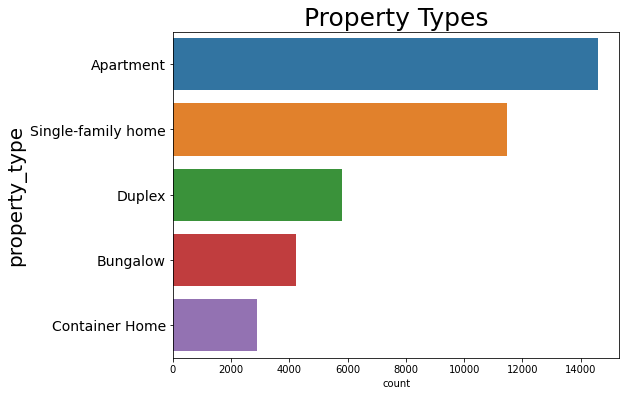

In [ ]:
count_plot(train,'property_type' ,title='Property Types',switchax=True)

In [ ]:
train['property_type'].value_counts()

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
Name: property_type, dtype: int64

#### The above plot and summary explain that most of the properties are apartments and single family homes.

### Let's see the habitability score distribution of various properties.

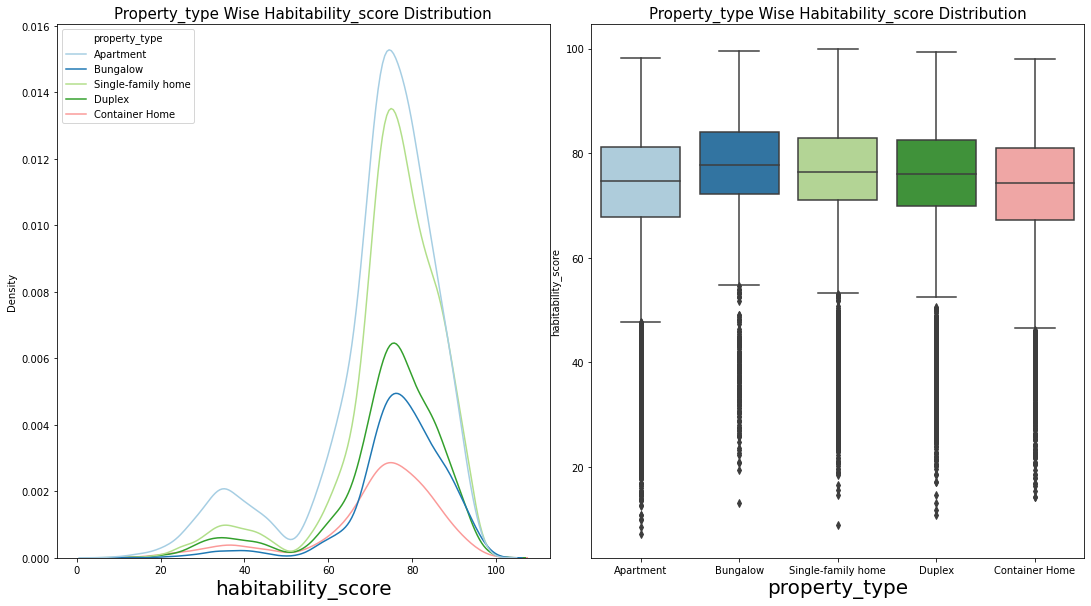

In [ ]:
side_by_side_plot(train,'property_type','habitability_score')

In [ ]:
group_summary(train,'property_type','habitability_score')

,property_type,count,mean,std,min,25%,50%,75%,max
1,Bungalow,4238.0,76.877683,11.504071,13.03,72.300,77.690,84.0575,99.59
4,Single-family home,11477.0,74.885441,12.931535,9.00,71.000,76.410,82.9400,100.00
3,Duplex,5806.0,73.715543,14.035303,10.85,69.910,75.970,82.5300,99.45
0,Apartment,14596.0,71.729413,15.146432,7.28,67.840,74.715,81.2800,98.18
2,Container Home,2872.0,71.290373,15.364032,14.27,67.195,74.340,81.0775,98.01


#### The above chart and summary explain that the single-family home properties have a maximum habitability score.

#### There is a mean difference between the property type's habitability score.

### Let's see the area(in square feet) of the property distribution.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


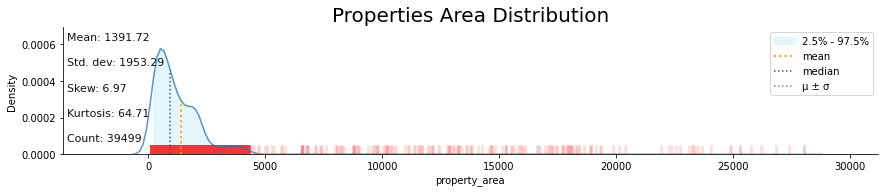

In [ ]:
klib.dist_plot(train['property_area']);
plt.title("Properties Area Distribution",fontsize=20);

In [ ]:
train['property_area'].describe()

count    39499.000000
mean      1391.715638
std       1953.287544
min        100.000000
25%        494.000000
50%        932.000000
75%       1770.000000
max      28064.000000
Name: property_area, dtype: float64

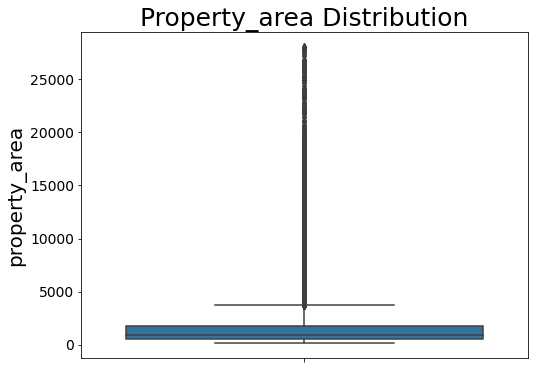

In [ ]:
box_plot(train,'property_area',rot=90)

#### The above histogram explains that the habitability score column is positively skewed(mean>median).

### The property area ranges from 100 to 28064 square feet.

### The average area of the properties is 1391.71 square feet.

#### The boxplot explains that there are outliers above the third quartile.

### Let's see the area of different types of properties.

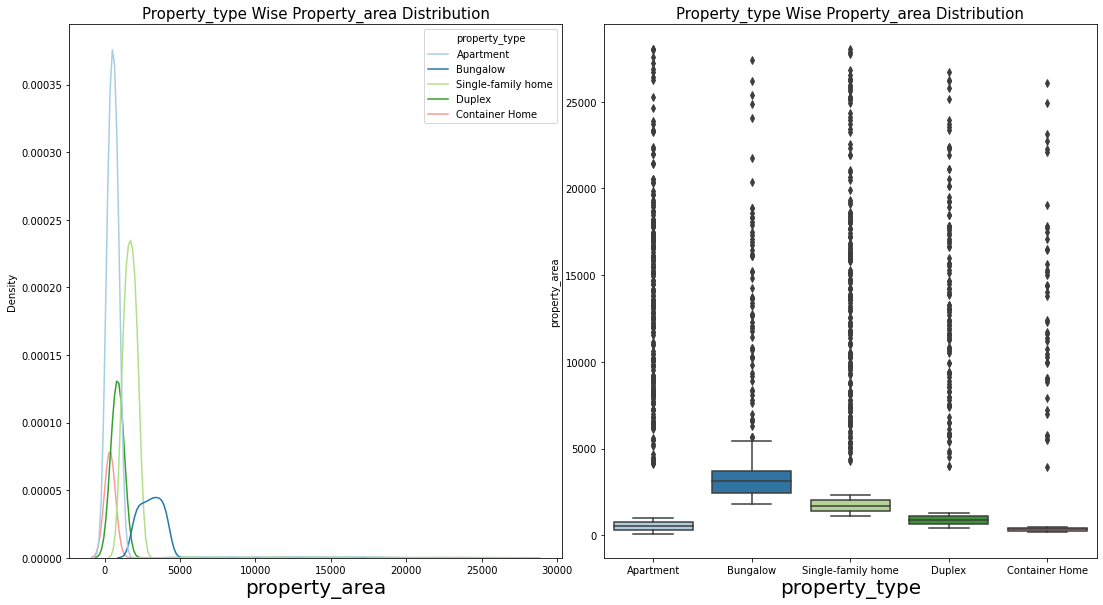

In [ ]:
side_by_side_plot(train,'property_type','property_area')

In [ ]:
group_summary(train,'property_type','property_area')

,property_type,count,mean,std,min,25%,50%,75%,max
1,Bungalow,4238.0,3229.712836,1618.625521,1800.0,2467.25,3114.5,3719.75,27403.0
4,Single-family home,11477.0,1895.760739,1766.849983,1100.0,1403.00,1709.0,2015.00,28033.0
3,Duplex,5806.0,1096.140028,1936.050155,400.0,634.00,866.0,1090.00,26723.0
0,Apartment,14596.0,744.753152,1756.012011,100.0,324.00,554.0,783.00,28064.0
2,Container Home,2872.0,548.941156,1741.346669,200.0,276.00,354.0,429.00,26079.0


#### The above summary and plot explain that the minimum area of the container home is higher than the apartment.

#### Bungalow property's minimum area is 1800 square feet.

#### Single-family home property's minimum area is 1100 square feet.




### Let's see if is there any relationship between the property area and habitability score by different property types.

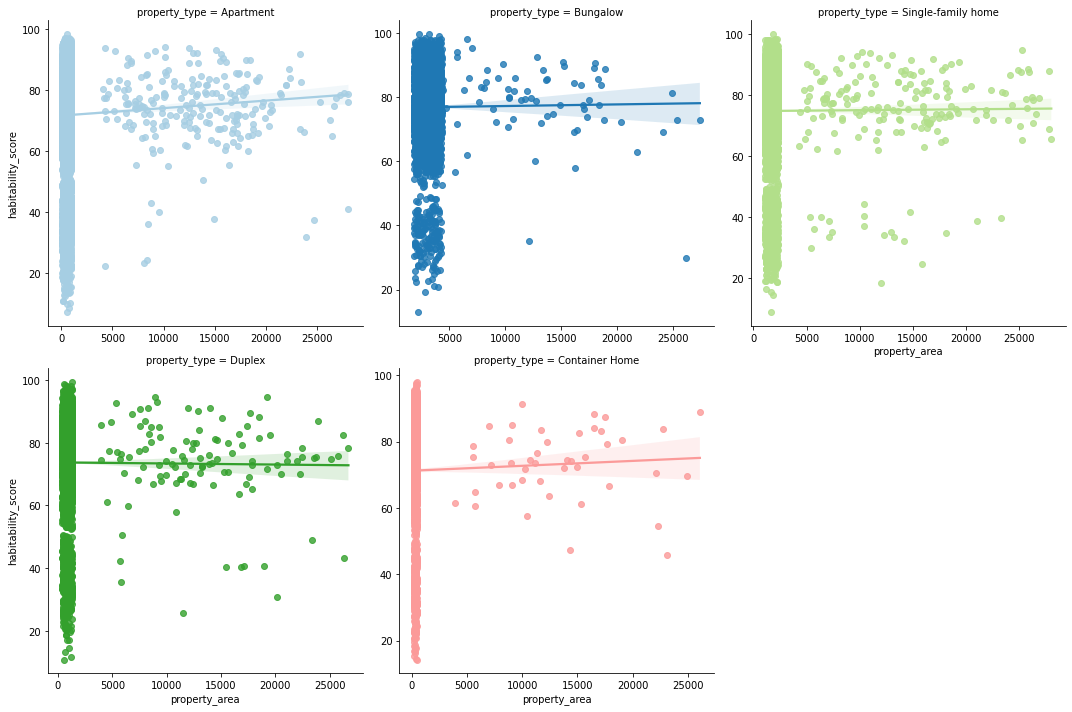

In [ ]:
sns.lmplot(data=train, x="property_area", y="habitability_score",hue='property_type',
           col='property_type',col_wrap=3,sharex=False,sharey=False,palette='Paired');


#### The above linear model plot explains that there is no significant relationship between the property area and habitability score.

### Let's see the number of windows in homes.

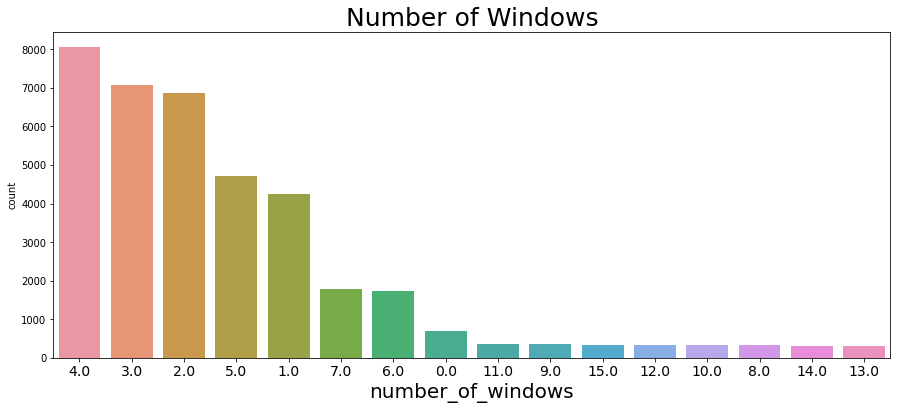

In [ ]:
count_plot(train,'number_of_windows' ,title='Number of Windows',size=(15,6))

In [ ]:
train['number_of_windows'].value_counts()

4.0     8053
3.0     7080
2.0     6857
5.0     4708
1.0     4254
7.0     1784
6.0     1738
0.0      699
11.0     363
9.0      352
15.0     336
12.0     336
10.0     335
8.0      326
14.0     316
13.0     308
Name: number_of_windows, dtype: int64

#### The above plot explains that most of properties have 1 to 7 windows.

### Let's see the number of windows of different types of properties.

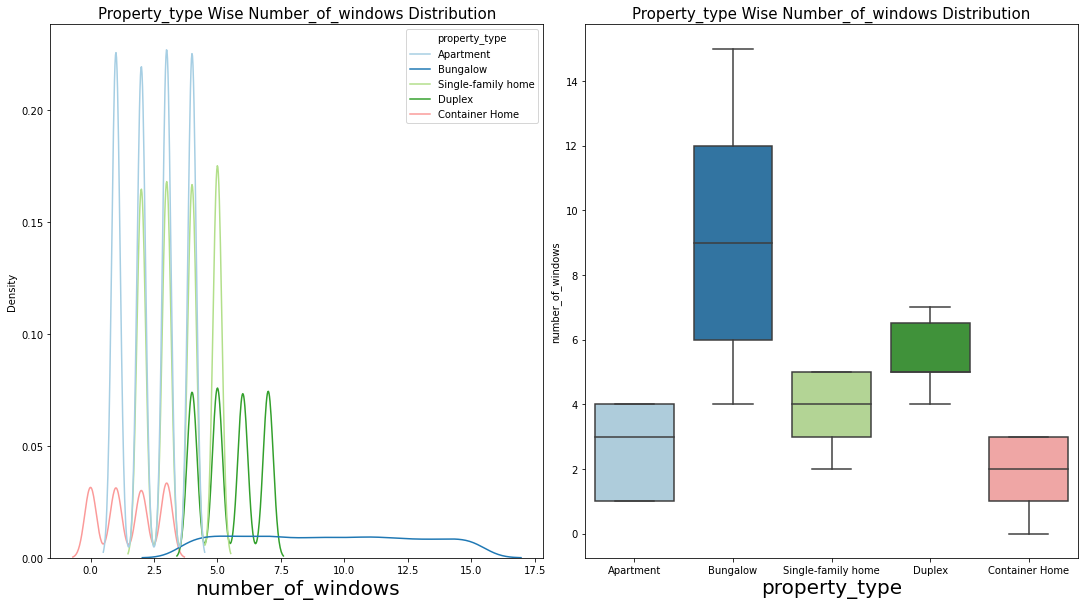

In [ ]:
side_by_side_plot(train,'property_type','number_of_windows')

In [ ]:
group_summary(train,'property_type','number_of_windows')

,property_type,count,mean,std,min,25%,50%,75%,max
1,Bungalow,4079.0,9.368718,3.445913,4.0,6.0,9.0,12.0,15.0
3,Duplex,5551.0,5.497928,1.116924,4.0,5.0,5.0,6.5,7.0
4,Single-family home,11017.0,3.522284,1.121309,2.0,3.0,4.0,5.0,5.0
0,Apartment,13965.0,2.503473,1.120148,1.0,1.0,3.0,4.0,4.0
2,Container Home,2743.0,1.518410,1.130574,0.0,1.0,2.0,3.0,3.0


#### The above plot explains that the bungalow-type properties have a minimum of 4 windows, a maximum of 12, and an average of 9 windows. 

### Let's see the habitability score by the number of windows.

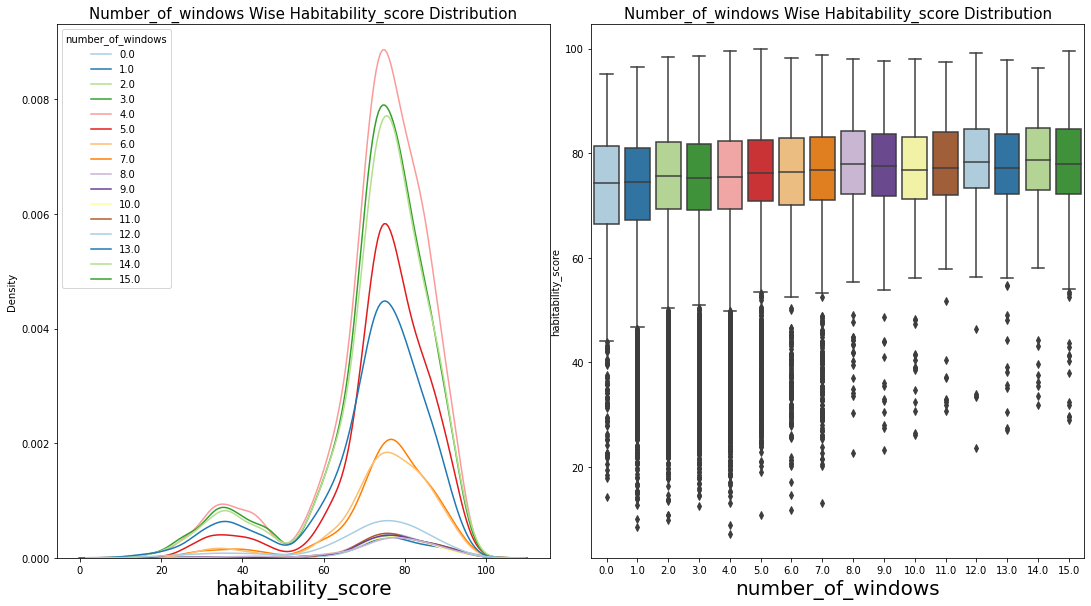

In [ ]:
side_by_side_plot(train,'number_of_windows','habitability_score')

In [ ]:
group_summary(train,'number_of_windows','habitability_score')

,number_of_windows,count,mean,std,min,25%,50%,75%,max
12,12.0,336.0,78.597589,9.830519,23.72,73.3375,78.345,84.6525,99.18
14,14.0,316.0,78.136361,10.354005,31.87,72.9450,78.720,84.7475,96.39
11,11.0,363.0,77.323388,10.524517,30.63,72.0500,77.090,84.1450,97.54
15,15.0,336.0,77.158095,11.257830,29.01,72.2850,77.860,84.7025,99.59
13,13.0,308.0,76.853377,11.227807,27.14,72.2625,77.260,83.7275,97.78
9,9.0,352.0,76.680199,11.490642,23.21,71.7525,77.470,83.7075,97.69
8,8.0,326.0,76.281994,12.224592,22.61,72.2475,77.900,84.1825,98.11
10,10.0,335.0,75.918388,11.637718,26.12,71.2000,76.810,83.0500,98.03
7,7.0,1784.0,74.819613,13.409348,13.03,70.9800,76.880,83.1200,98.87
5,5.0,4708.0,74.714911,12.889620,10.85,70.9100,76.245,82.5525,100.00


#### The above plot and summary explain that there is no significant difference between the habitability score and the number of windows in the home.

### Let's see the number of doors in homes.

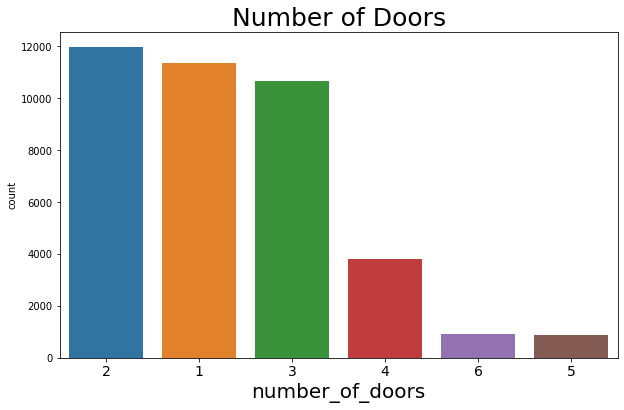

In [ ]:
count_plot(train,'number_of_doors' ,title='Number of Doors',size=(10,6))

In [ ]:
train['number_of_doors'].value_counts()

2    11958
1    11337
3    10647
4     3789
6      897
5      871
Name: number_of_doors, dtype: int64

#### The above plot explains that most of the properties have 1 to 3 doors.

### Let's see the number of doors of different types of properties.

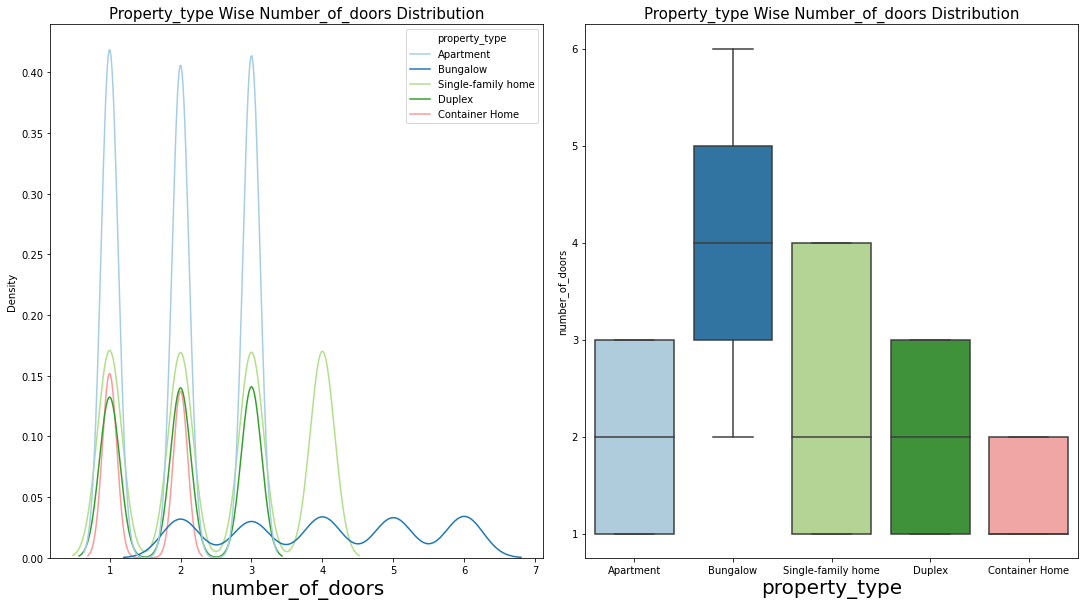

In [ ]:
side_by_side_plot(train,'property_type','number_of_doors')

In [ ]:
group_summary(train,'property_type','number_of_doors')

,property_type,count,mean,std,min,25%,50%,75%,max
1,Bungalow,4238.0,4.046720,1.417277,2.0,3.0,4.0,5.0,6.0
4,Single-family home,11477.0,2.498475,1.119678,1.0,1.0,2.0,4.0,4.0
3,Duplex,5806.0,2.020496,0.812961,1.0,1.0,2.0,3.0,3.0
0,Apartment,14596.0,1.996026,0.819920,1.0,1.0,2.0,3.0,3.0
2,Container Home,2872.0,1.474930,0.499458,1.0,1.0,1.0,2.0,2.0


#### The above plot explains that the bungalow-type properties have a minimum of 2 doors, maximum 6, and average 4 doors.

#### 50 percentage of container home properties have 1 doors.

### Let's see the habitability score by the number of doors.

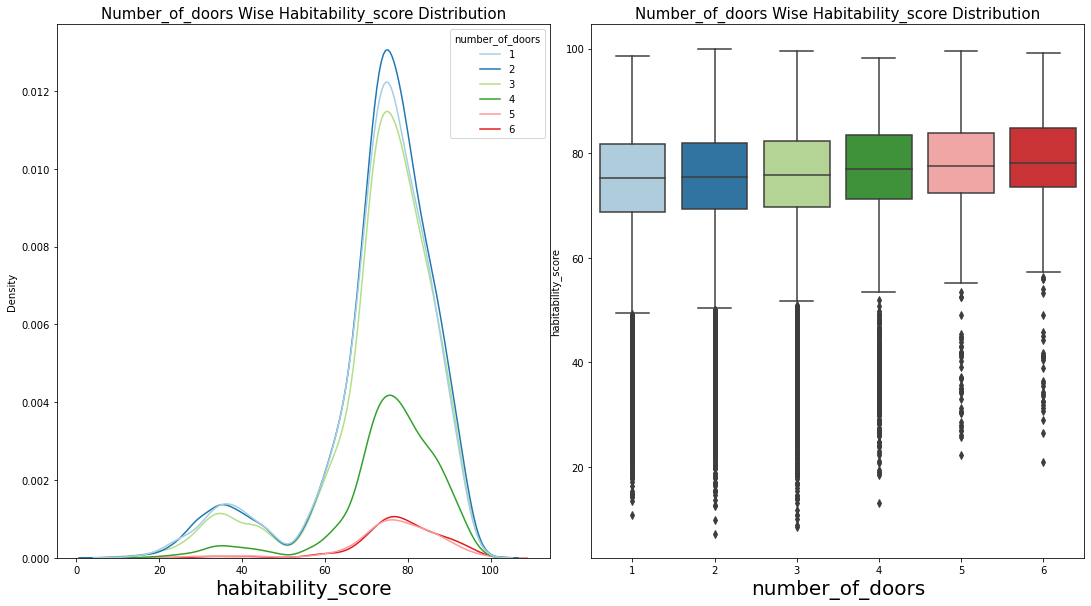

In [ ]:
side_by_side_plot(train,'number_of_doors','habitability_score')

In [ ]:
group_summary(train,'number_of_doors','habitability_score')

,number_of_doors,count,mean,std,min,25%,50%,75%,max
5,6,897.0,77.959476,10.990192,20.98,73.520,78.08,84.77,99.18
4,5,871.0,76.533100,11.937749,22.32,72.385,77.51,83.91,99.59
3,4,3789.0,75.401127,12.858782,13.03,71.280,76.91,83.48,98.24
2,3,10647.0,73.462614,14.119908,8.52,69.750,75.77,82.28,99.55
1,2,11958.0,73.093228,14.370756,7.28,69.280,75.51,81.94,100.00
0,1,11337.0,72.681231,14.471308,10.85,68.830,75.20,81.77,98.58


#### The above plot and summary explain that there is no significant difference between the habitability score and the number of doors in the home.

### Let's see the different furnishing categories.

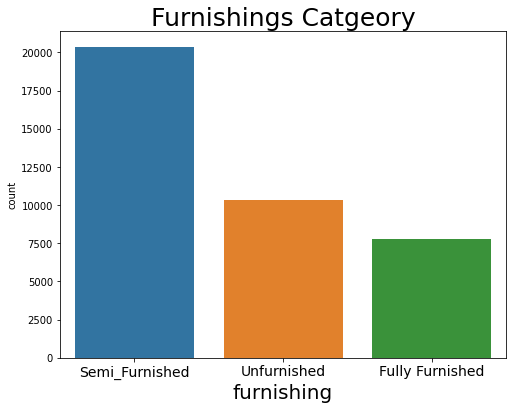

In [ ]:
count_plot(train,'furnishing' ,title='Furnishings Catgeory')

In [ ]:
train['furnishing'].value_counts()

Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
Name: furnishing, dtype: int64

#### The above plot explains that most properties have semi-furnished.

### Let's see the habitability score of different types of furnishing.

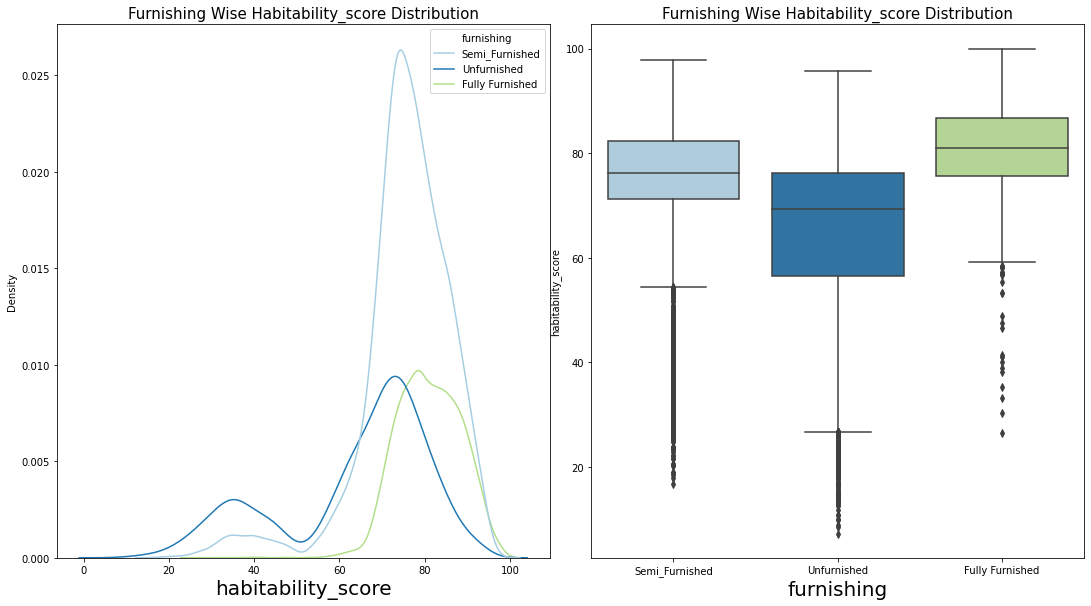

In [ ]:
side_by_side_plot(train,'furnishing','habitability_score')

In [ ]:
group_summary(train,'furnishing','habitability_score')

,furnishing,count,mean,std,min,25%,50%,75%,max
0,Fully Furnished,7756.0,81.065201,7.484549,26.51,75.6100,80.945,86.6900,100.00
1,Semi_Furnished,20357.0,75.478654,11.050474,16.76,71.2100,76.300,82.3900,97.84
2,Unfurnished,10344.0,63.857112,17.760374,7.28,56.4575,69.280,76.2425,95.71


#### The above plot explains that there is a significant difference between the habitability score and the home furnishing types.

### Let's see what are the furnishing options available in different properties.

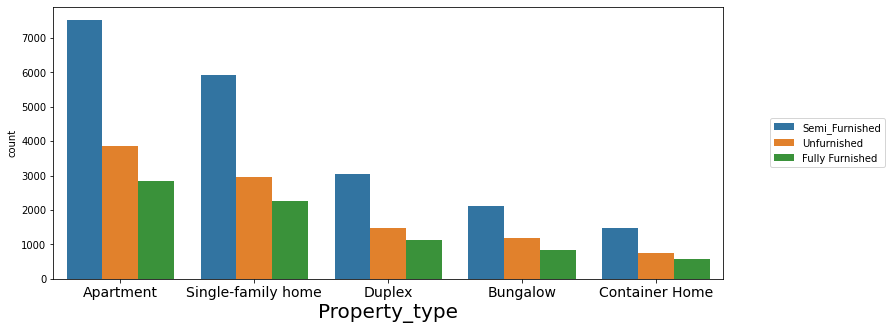

In [ ]:
grp_count_plot(train,'property_type','furnishing',size=(12,5))

In [ ]:
group_by_perc(train,'property_type','furnishing',sortby='property_type',sort=True)

,property_type,furnishing,count,percentage
0,Apartment,Fully Furnished,2835,7.47
1,Apartment,Semi_Furnished,7525,19.82
2,Apartment,Unfurnished,3865,10.18
3,Bungalow,Fully Furnished,839,2.21
4,Bungalow,Semi_Furnished,2108,5.55
5,Bungalow,Unfurnished,1172,3.09
6,Container Home,Fully Furnished,580,1.53
7,Container Home,Semi_Furnished,1488,3.92
8,Container Home,Unfurnished,742,1.95
9,Duplex,Fully Furnished,1128,2.97


#### The above plot and summary explain that mostly semi-furnished and unfurnished category homes are available in all property types.

### Let's the habitability score by different properties and its furnishing category.

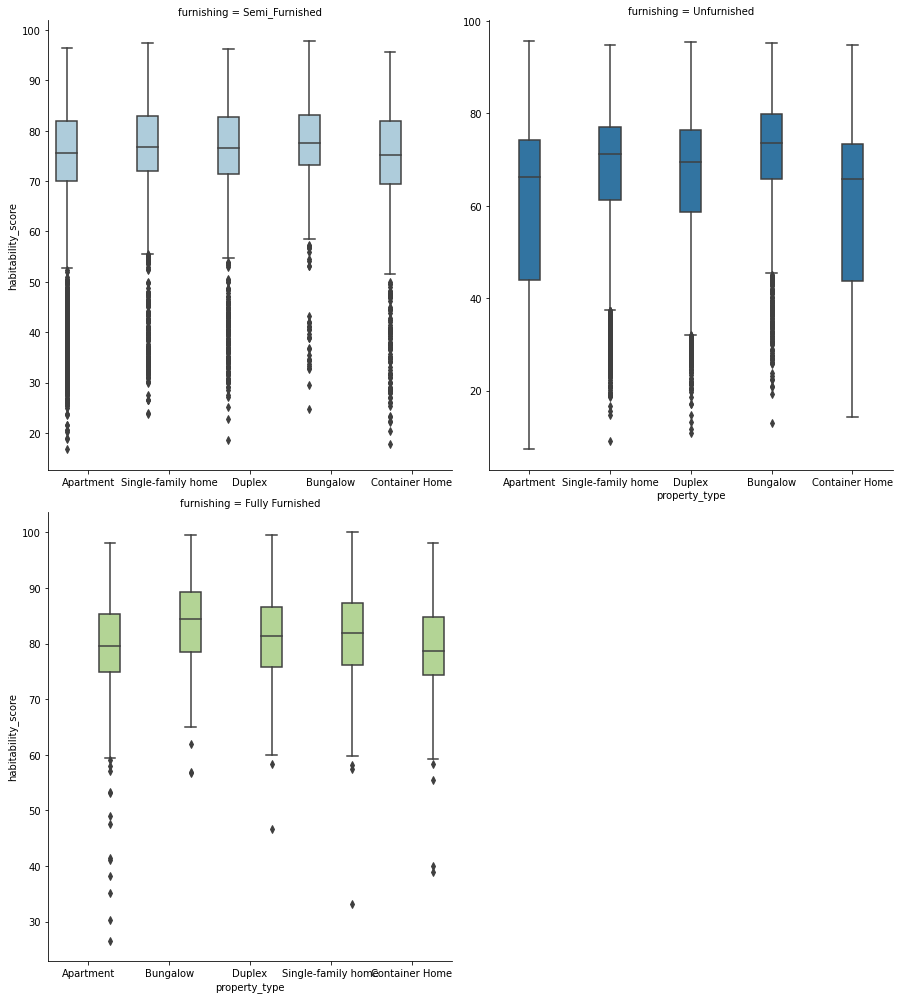

In [ ]:
sns.catplot(data=train, x="property_type", y="habitability_score",hue='furnishing',
           col='furnishing',col_wrap=2,sharex=False,sharey=False,palette='Paired',
            kind='box',height=7,aspect=.9);


In [ ]:
group_summary(train,['property_type','furnishing'],'habitability_score')

,property_type,furnishing,count,mean,std,min,25%,50%,75%,max
3,Bungalow,Fully Furnished,839.0,83.891001,7.300830,56.67,78.4350,84.450,89.3100,99.55
12,Single-family home,Fully Furnished,2261.0,81.758280,7.193250,33.24,76.2000,81.980,87.3500,100.00
9,Duplex,Fully Furnished,1128.0,81.261082,7.349773,46.66,75.7100,81.310,86.6100,99.45
0,Apartment,Fully Furnished,2835.0,79.957386,7.524826,26.51,74.8850,79.650,85.3150,98.18
6,Container Home,Fully Furnished,580.0,79.370466,7.512145,38.96,74.2975,78.705,84.7075,98.01
4,Bungalow,Semi_Furnished,2108.0,77.734730,8.647558,24.73,73.1000,77.560,83.0475,97.84
13,Single-family home,Semi_Furnished,5939.0,76.538916,9.918198,23.75,71.9900,76.710,82.9700,97.43
10,Duplex,Semi_Furnished,3045.0,75.501977,11.285244,18.52,71.3900,76.480,82.6900,96.25
1,Apartment,Semi_Furnished,7525.0,74.344344,11.889738,16.76,70.1000,75.500,81.8400,96.41
7,Container Home,Semi_Furnished,1488.0,73.786868,12.613938,17.89,69.3950,75.270,81.9275,95.64


#### The above plot and summary explain that the furnished and semi-furnished category homes' average habitability score is almost similar to all types of properties.



### Let's see the number of power cuts per week.

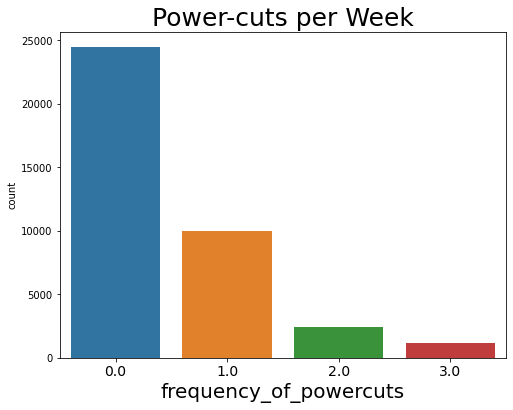

In [ ]:
count_plot(train,'frequency_of_powercuts' ,title='Power-cuts per Week')

In [ ]:
train['frequency_of_powercuts'].value_counts()

0.0    24471
1.0    10010
2.0     2441
3.0     1194
Name: frequency_of_powercuts, dtype: int64

#### The above plot explains that most of the properties have zero power cuts per week.

### Let's see the habitability score by the different number of power cuts per week.

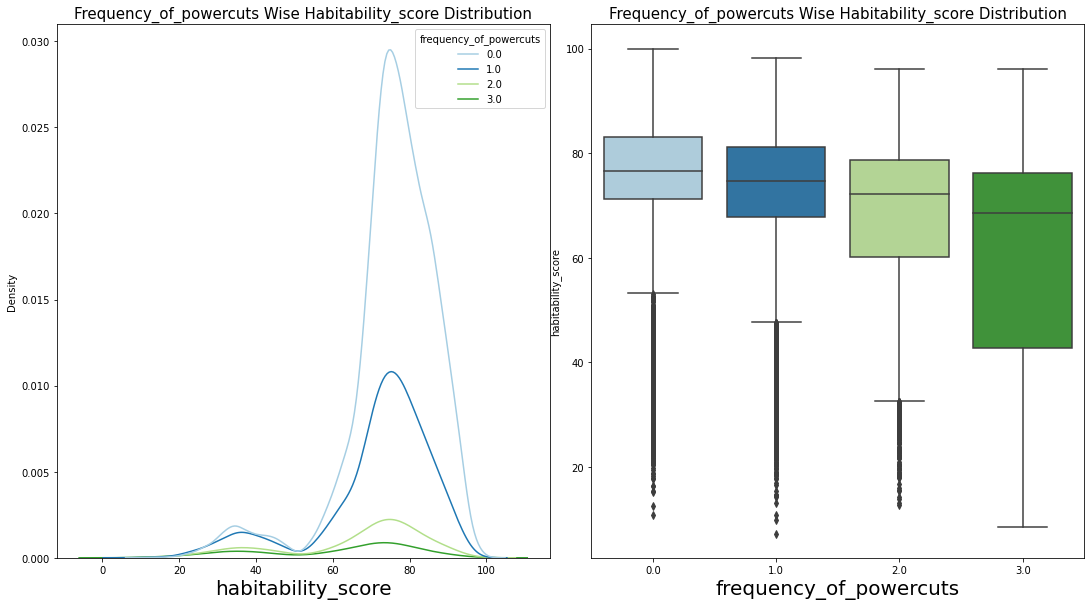

In [ ]:
side_by_side_plot(train,'frequency_of_powercuts','habitability_score')

In [ ]:
group_summary(train,'frequency_of_powercuts','habitability_score')

,frequency_of_powercuts,count,mean,std,min,25%,50%,75%,max
0,0.0,24471.0,75.483540,12.188210,10.85,71.160,76.70,83.1800,100.00
1,1.0,10010.0,71.716998,15.017956,7.28,67.750,74.78,81.1575,98.19
2,2.0,2441.0,66.648513,18.015034,12.81,60.210,72.27,78.6500,96.19
3,3.0,1194.0,61.251256,20.084020,8.52,42.825,68.50,76.2375,96.02


#### The above plot explains that there is a significant difference between the habitability score and the per-week power-cut counts.

### Let's see the per-week power-cut counts in the different property's.

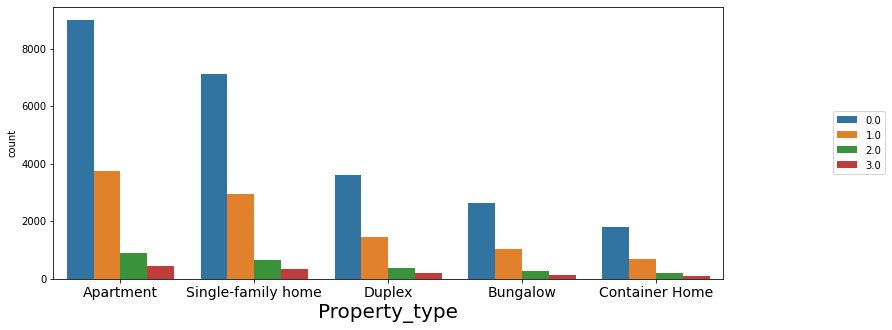

In [ ]:
grp_count_plot(train,'property_type','frequency_of_powercuts',size=(12,5))

In [ ]:
group_by_perc(train,'property_type','frequency_of_powercuts',sortby='property_type',sort=True)

,property_type,frequency_of_powercuts,count,percentage
0,Apartment,0.0,8993,23.90
1,Apartment,1.0,3748,9.96
2,Apartment,2.0,912,2.42
3,Apartment,3.0,433,1.15
4,Bungalow,0.0,2646,7.03
5,Bungalow,1.0,1038,2.76
6,Bungalow,2.0,279,0.74
7,Bungalow,3.0,127,0.34
11,Container Home,3.0,86,0.23
10,Container Home,2.0,198,0.53


#### The above plot and summary explain that the per week power-cut count is almost similar in all property types.

### Let's the habitability score by the different property and the number of power cuts per week.

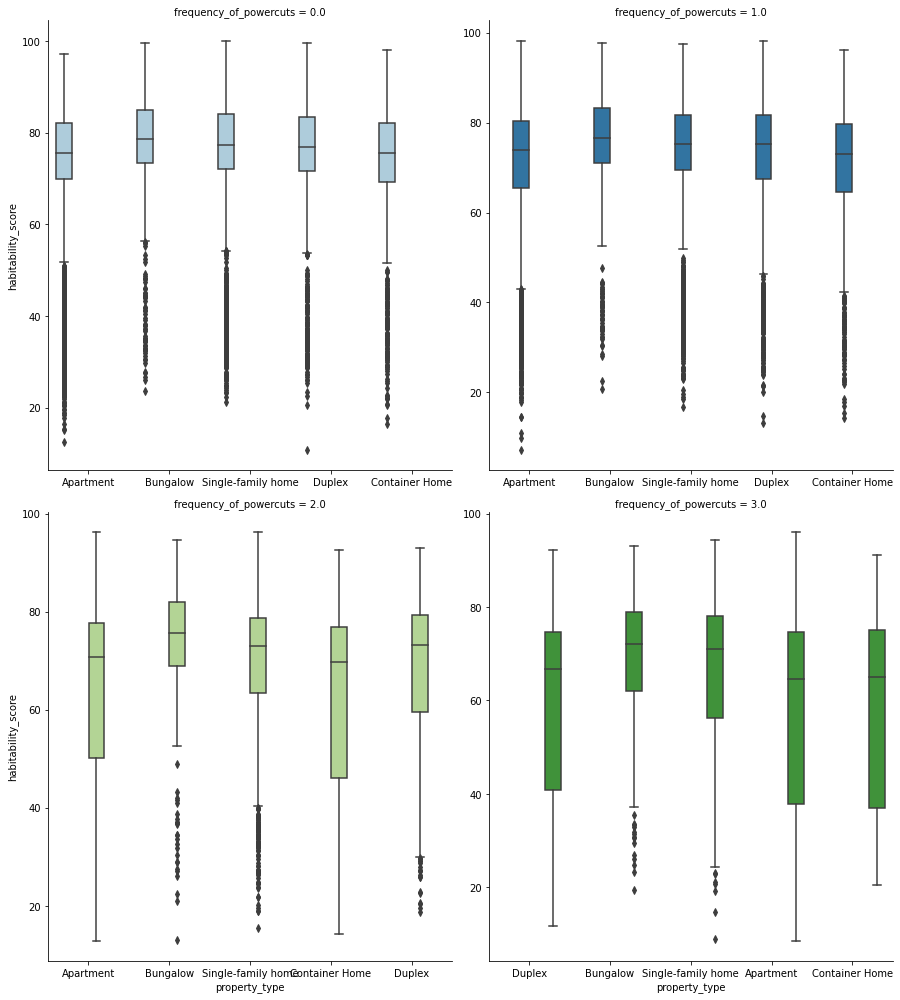

In [ ]:
sns.catplot(data=train, x="property_type", y="habitability_score",hue='frequency_of_powercuts',
           col='frequency_of_powercuts',col_wrap=2,sharex=False,sharey=False,palette='Paired',
            kind='box',height=7,aspect=.9);


In [ ]:
group_summary(train,['property_type','frequency_of_powercuts'],'habitability_score')

,property_type,frequency_of_powercuts,count,mean,std,min,25%,50%,75%,max
4,Bungalow,0.0,2646.0,78.439127,9.996729,23.72,73.4225,78.515,84.8275,99.59
16,Single-family home,0.0,7104.0,76.685414,11.230765,21.20,72.1375,77.355,84.1100,100.00
12,Duplex,0.0,3608.0,75.905272,11.668489,10.85,71.5050,76.820,83.4700,99.45
5,Bungalow,1.0,1038.0,75.265308,11.970206,20.72,70.9325,76.525,83.3075,97.67
0,Apartment,0.0,8993.0,73.875759,13.164600,12.58,69.8600,75.640,82.1000,97.09
8,Container Home,0.0,1796.0,73.688680,13.254325,16.34,69.2975,75.460,82.0475,98.01
17,Single-family home,1.0,2960.0,73.137334,13.724520,16.64,69.4100,75.330,81.5925,97.56
6,Bungalow,2.0,279.0,72.747097,15.044318,13.03,68.9850,75.680,82.0500,94.52
13,Duplex,1.0,1447.0,71.797305,15.347289,13.16,67.4100,75.230,81.6400,98.19
1,Apartment,1.0,3748.0,70.030961,16.061015,7.28,65.3750,73.975,80.3375,98.18


#### The above plot and summary explain that the number of power cuts in per week does not affect the habitability score of the properties.

### Let's see the power backup availability of properties.

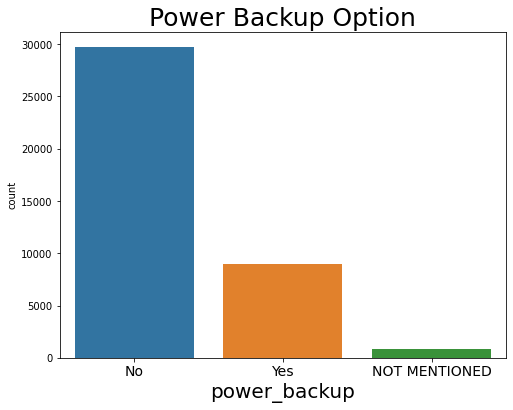

In [ ]:
count_plot(train,'power_backup' ,title='Power Backup Option')

In [ ]:
train['power_backup'].value_counts()

No               29714
Yes               8957
NOT MENTIONED      828
Name: power_backup, dtype: int64

#### The above plot explains that most of the properties don't have any power backup option.

### Let's see the habitability score by power backup option.

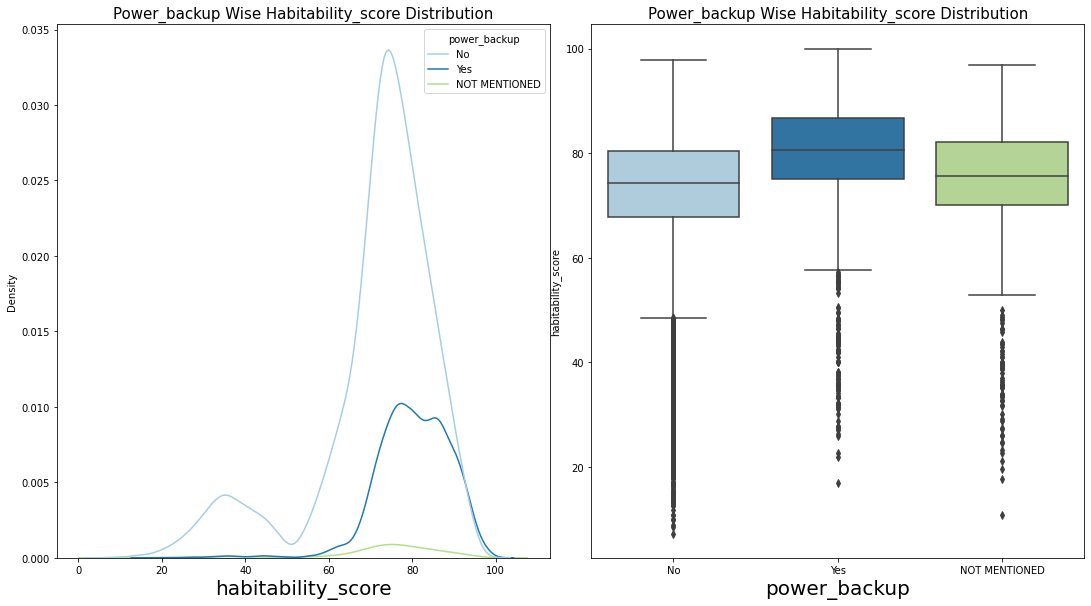

In [ ]:
side_by_side_plot(train,'power_backup','habitability_score')

In [ ]:
group_summary(train,'power_backup','habitability_score')

,power_backup,count,mean,std,min,25%,50%,75%,max
2,Yes,8957.0,80.377410,8.790342,16.95,74.98,80.540,86.6600,100.00
0,NOT MENTIONED,828.0,73.756304,13.691085,10.88,70.19,75.565,82.0925,96.84
1,No,29714.0,71.396196,14.757762,7.28,67.74,74.340,80.5200,97.83


#### The above plot explains that there is no significant difference between the habitability score and the power backup option.

#### Power backup option doesn't affect the habitability score of the properties.

### Let's see the power backup options of different property.

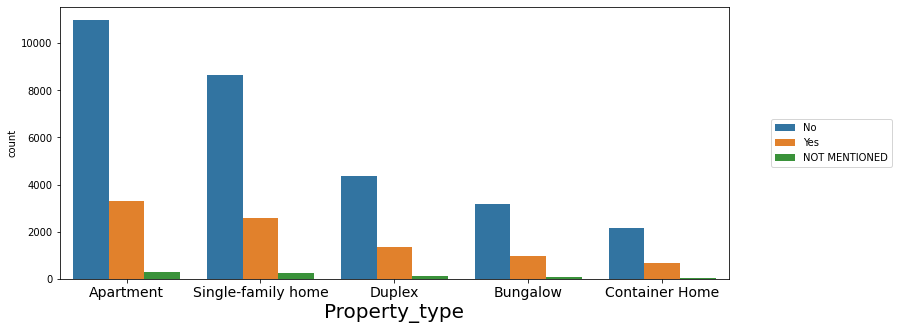

In [ ]:
grp_count_plot(train,'property_type','power_backup',size=(12,5))

In [ ]:
group_by_perc(train,'property_type','power_backup',sortby='property_type',sort=True)

,property_type,power_backup,count,percentage
0,Apartment,NOT MENTIONED,300,0.77
1,Apartment,No,10989,28.18
2,Apartment,Yes,3307,8.48
3,Bungalow,NOT MENTIONED,96,0.25
4,Bungalow,No,3169,8.13
5,Bungalow,Yes,973,2.50
6,Container Home,NOT MENTIONED,52,0.13
7,Container Home,No,2157,5.53
8,Container Home,Yes,663,1.70
9,Duplex,NOT MENTIONED,125,0.32


#### The above plot and summary explain that the power backup option is almost similar in all property types.

### Let's the habitability score by different property and power backup options of the properties.

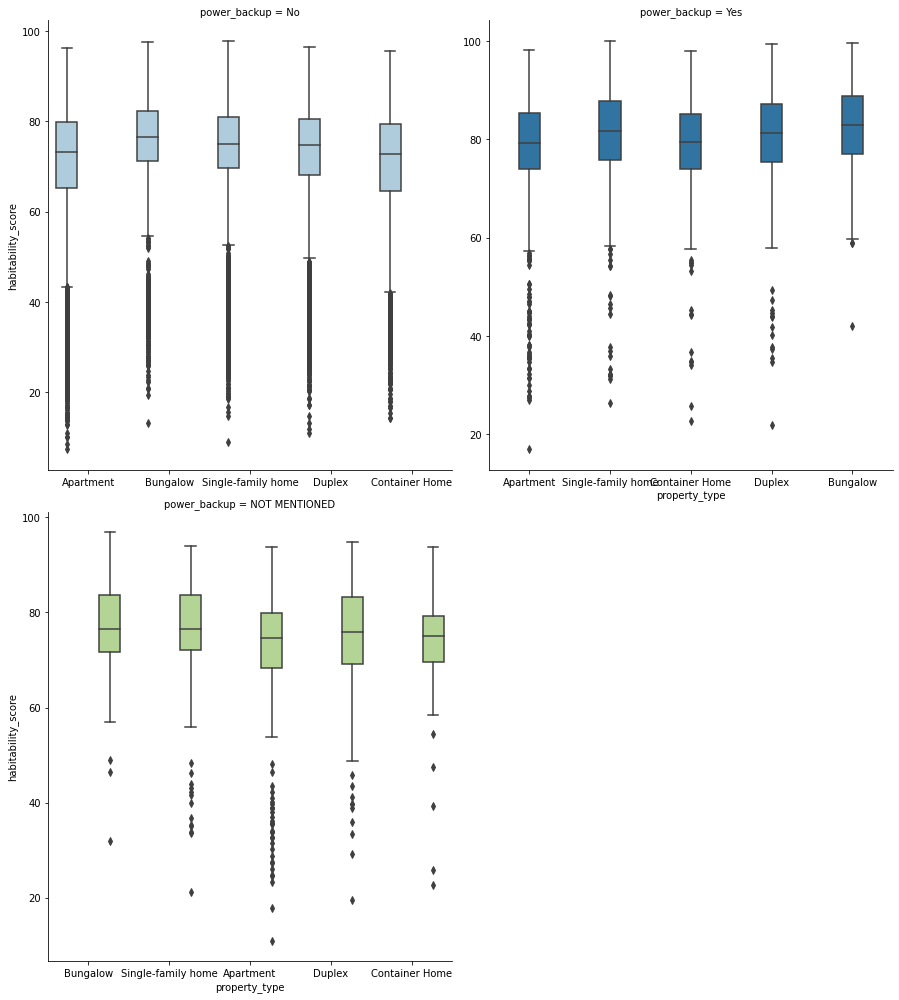

In [ ]:
sns.catplot(data=train, x="property_type", y="habitability_score",hue='power_backup',
           col='power_backup',col_wrap=2,sharex=False,sharey=False,palette='Paired',
            kind='box',height=7,aspect=.9);


In [ ]:
group_summary(train,['property_type','power_backup'],'habitability_score')

,property_type,power_backup,count,mean,std,min,25%,50%,75%,max
5,Bungalow,Yes,973.0,82.678530,8.075389,42.07,77.0000,82.920,88.850,99.59
14,Single-family home,Yes,2575.0,81.369685,8.292173,26.28,75.7450,81.610,87.705,100.00
11,Duplex,Yes,1330.0,80.820669,8.799179,21.85,75.3125,81.225,87.120,99.45
2,Apartment,Yes,3307.0,79.016015,9.038635,16.95,74.0400,79.180,85.315,98.18
8,Container Home,Yes,663.0,78.989261,9.209250,22.76,73.9400,79.410,85.110,98.01
3,Bungalow,NOT MENTIONED,96.0,76.664896,10.781048,31.92,71.6675,76.450,83.595,96.84
12,Single-family home,NOT MENTIONED,240.0,76.101792,12.010633,21.23,72.2025,76.550,83.640,94.00
4,Bungalow,No,3169.0,75.103055,11.833044,13.03,71.0900,76.420,82.210,97.54
9,Duplex,NOT MENTIONED,125.0,73.544320,14.411222,19.60,69.2100,75.790,83.250,94.83
13,Single-family home,No,8662.0,72.924133,13.445127,9.00,69.5700,75.050,80.980,97.83


#### The above plot and summary explain that the power backup options don't affect the habitability score of the properties.



### Let's see the water supply option of properties.

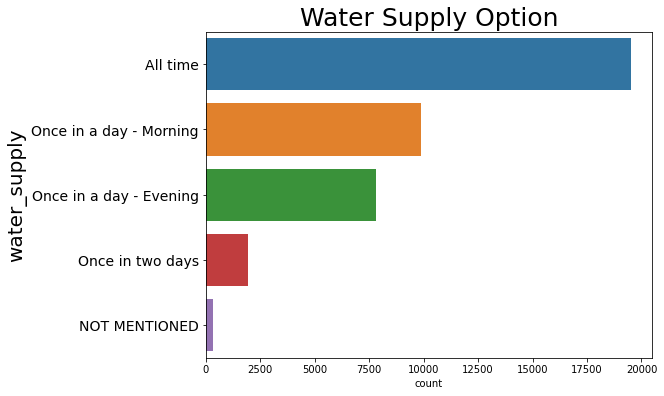

In [ ]:
count_plot(train,'water_supply' ,title='Water Supply Option',switchax=True)

In [ ]:
train['water_supply'].value_counts()

All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: water_supply, dtype: int64

#### The above plot explains that most of the properties have all time water supply option.

### Let's see the habitability score by water supply option.

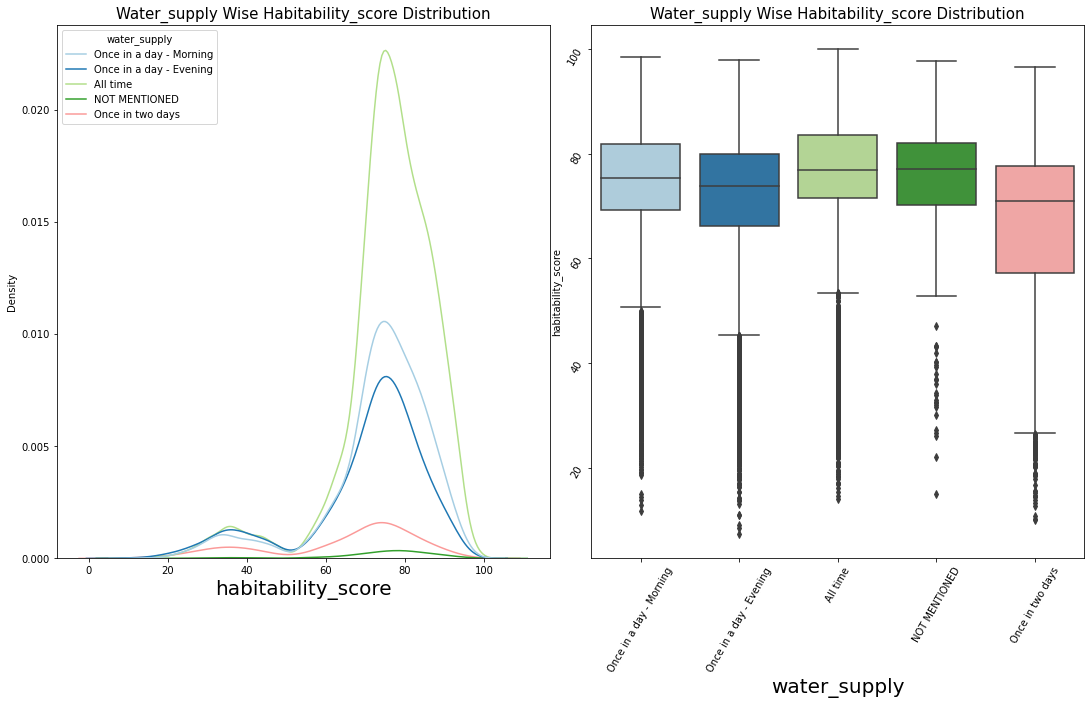

In [ ]:
side_by_side_plot(train,'water_supply','habitability_score',rot=60)

In [ ]:
group_summary(train,'water_supply','habitability_score')

,water_supply,count,mean,std,min,25%,50%,75%,max
0,All time,19511.0,75.792935,12.267286,13.93,71.510,77.00,83.580,100.00
1,NOT MENTIONED,345.0,73.990667,14.091686,15.02,70.190,77.05,82.120,97.78
3,Once in a day - Morning,9897.0,73.209474,13.891459,11.77,69.310,75.42,81.970,98.52
2,Once in a day - Evening,7815.0,70.179611,15.779910,7.28,66.125,73.93,80.020,97.97
4,Once in two days,1931.0,64.809259,18.747326,9.94,57.230,71.08,77.665,96.66


#### The above plot explains that there is no significant difference between the habitability score and the water supply option.


### Let's see the water supply options of different property.

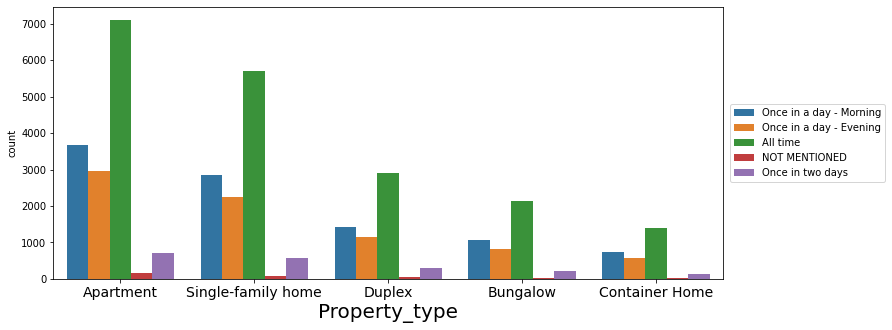

In [ ]:
grp_count_plot(train,'property_type','water_supply',size=(12,5))

In [ ]:
group_by_perc(train,'property_type','water_supply',sortby='property_type',sort=True)

,property_type,water_supply,count,percentage
0,Apartment,All time,7106,18.23
1,Apartment,NOT MENTIONED,156,0.40
2,Apartment,Once in a day - Evening,2953,7.57
3,Apartment,Once in a day - Morning,3677,9.43
4,Apartment,Once in two days,704,1.81
5,Bungalow,All time,2136,5.48
6,Bungalow,NOT MENTIONED,29,0.07
7,Bungalow,Once in a day - Evening,806,2.07
8,Bungalow,Once in a day - Morning,1062,2.72
9,Bungalow,Once in two days,205,0.53


#### The above plot and summary explain that the water supply option is almost similar in all property types.

### Let's the habitability score by different properties and water supply options of the various property.

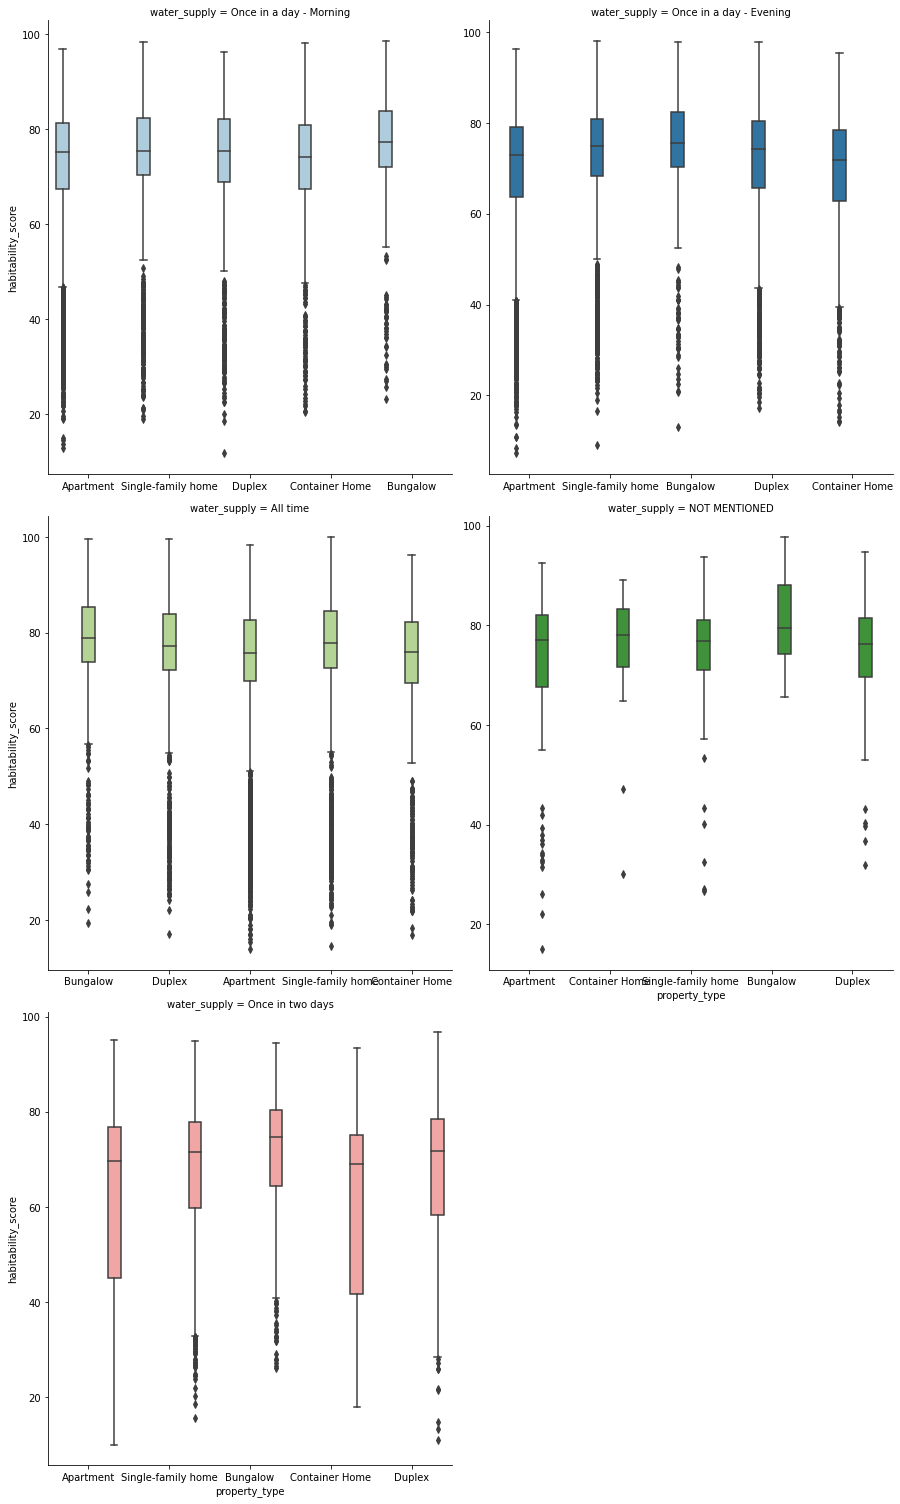

In [ ]:
sns.catplot(data=train, x="property_type", y="habitability_score",hue='water_supply',
           col='water_supply',col_wrap=2,sharex=False,sharey=False,palette='Paired',
            kind='box',height=7,aspect=.9);


In [ ]:
group_summary(train,['property_type','water_supply'],'habitability_score')

,property_type,water_supply,count,mean,std,min,25%,50%,75%,max
6,Bungalow,NOT MENTIONED,29.0,81.113103,8.235365,65.71,74.3400,79.400,88.0300,97.78
5,Bungalow,All time,2136.0,78.639691,10.308145,19.34,73.8375,78.860,85.2825,99.59
20,Single-family home,All time,5713.0,77.162219,11.202145,14.62,72.6900,77.770,84.5800,100.00
8,Bungalow,Once in a day - Morning,1062.0,76.620085,10.829799,23.21,71.9525,77.335,83.8950,98.52
15,Duplex,All time,2900.0,76.324769,11.763567,17.14,72.1625,77.190,83.8200,99.45
11,Container Home,NOT MENTIONED,27.0,75.627407,12.620034,30.03,71.5600,78.050,83.2950,89.05
23,Single-family home,Once in a day - Morning,2860.0,74.377986,12.338316,18.98,70.2775,75.390,82.2825,98.24
7,Bungalow,Once in a day - Evening,806.0,74.150583,12.803095,13.03,70.3450,75.485,82.3425,97.67
21,Single-family home,NOT MENTIONED,87.0,74.114828,12.476503,26.63,71.1050,76.820,81.1550,93.64
0,Apartment,All time,7106.0,74.059856,13.169882,13.93,69.8900,75.705,82.5250,98.18


#### The above plot and summary explain that the once-in-day - morning/evening category water supply options have a low habitability score of the properties.



### Let's see the traffic density score distribution of the property.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


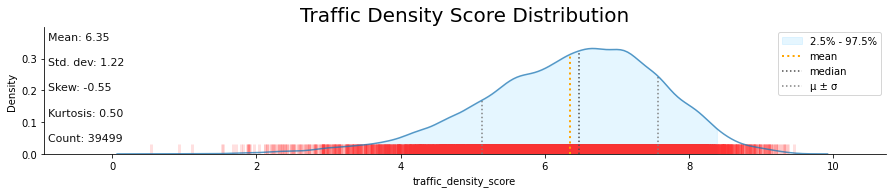

In [ ]:
klib.dist_plot(train['traffic_density_score']);
plt.title("Traffic Density Score Distribution",fontsize=20);

In [ ]:
train['traffic_density_score'].describe()

count    39499.000000
mean         6.354772
std          1.219681
min          0.000000
25%          5.600000
50%          6.470000
75%          7.220000
max          9.910000
Name: traffic_density_score, dtype: float64

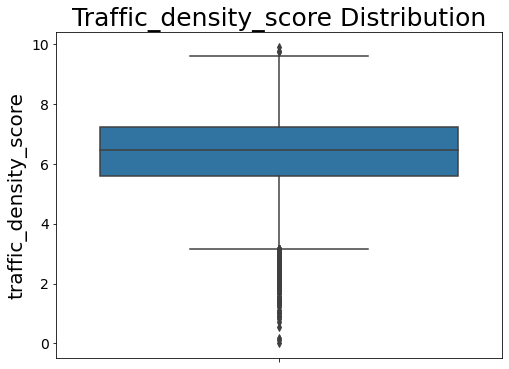

In [ ]:
box_plot(train,'traffic_density_score',rot=90)

#### The above histogram explains that the traffic density score column is normally distributed.

### The traffic density score ranges from 0.0 to 9.91.

### The average traffic density score is 6.4.

#### The boxplot explains that there are outliers above the third quartile and below the first quartile.

### Let's see the traffic density score of different types of property.

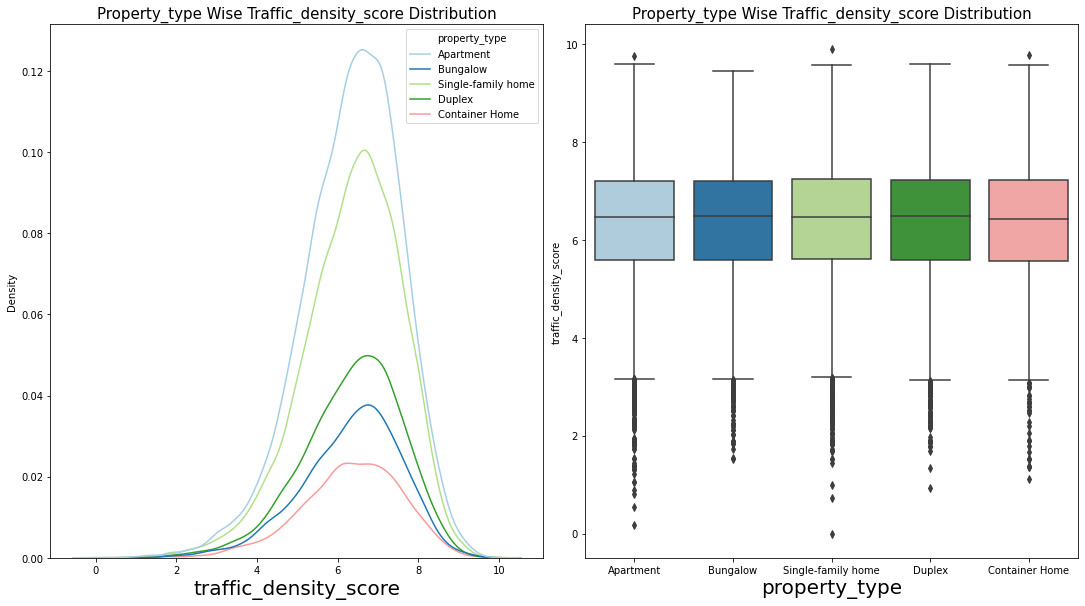

In [ ]:
side_by_side_plot(train,'property_type','traffic_density_score')

In [ ]:
group_summary(train,'property_type','traffic_density_score')

,property_type,count,mean,std,min,25%,50%,75%,max
4,Single-family home,11477.0,6.364186,1.218524,0.00,5.62,6.47,7.24,9.91
0,Apartment,14596.0,6.354620,1.210144,0.18,5.59,6.46,7.21,9.75
3,Duplex,5806.0,6.351612,1.230686,0.93,5.59,6.48,7.23,9.60
1,Bungalow,4238.0,6.341288,1.229548,1.53,5.59,6.48,7.21,9.45
2,Container Home,2872.0,6.334001,1.243709,1.11,5.58,6.42,7.22,9.79


#### The above summary and plot explain that the traffic density is almost similar in all types of property.



### Let's see if is there any relationship between the traffic density score and habitability score by different property types.

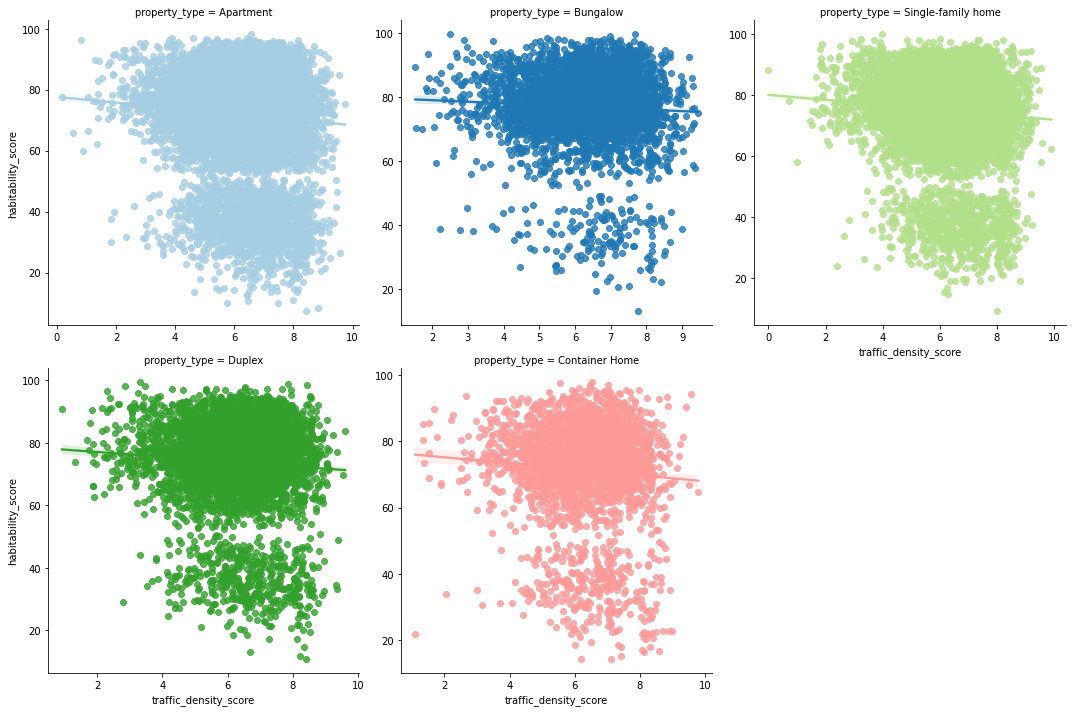

In [ ]:
sns.lmplot(data=train, x="traffic_density_score", y="habitability_score",hue='property_type',
           col='property_type',col_wrap=3,sharex=False,sharey=False,palette='Paired');


#### The above linear model plot explains that there is a negative relationship between the traffic density score and habitability score.

### Let's see the neighborhood crime rate categories.

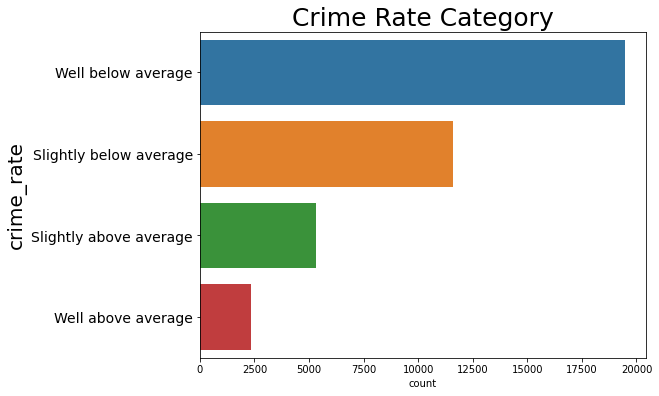

In [ ]:
count_plot(train,'crime_rate' ,title='Crime Rate Category',switchax=True)

In [ ]:
train['crime_rate'].value_counts()

Well below average        19472
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: crime_rate, dtype: int64

#### The above plot explains that most of the neighborhood has a well below average crime rate.

### Let's see the habitability score by crime rate category.

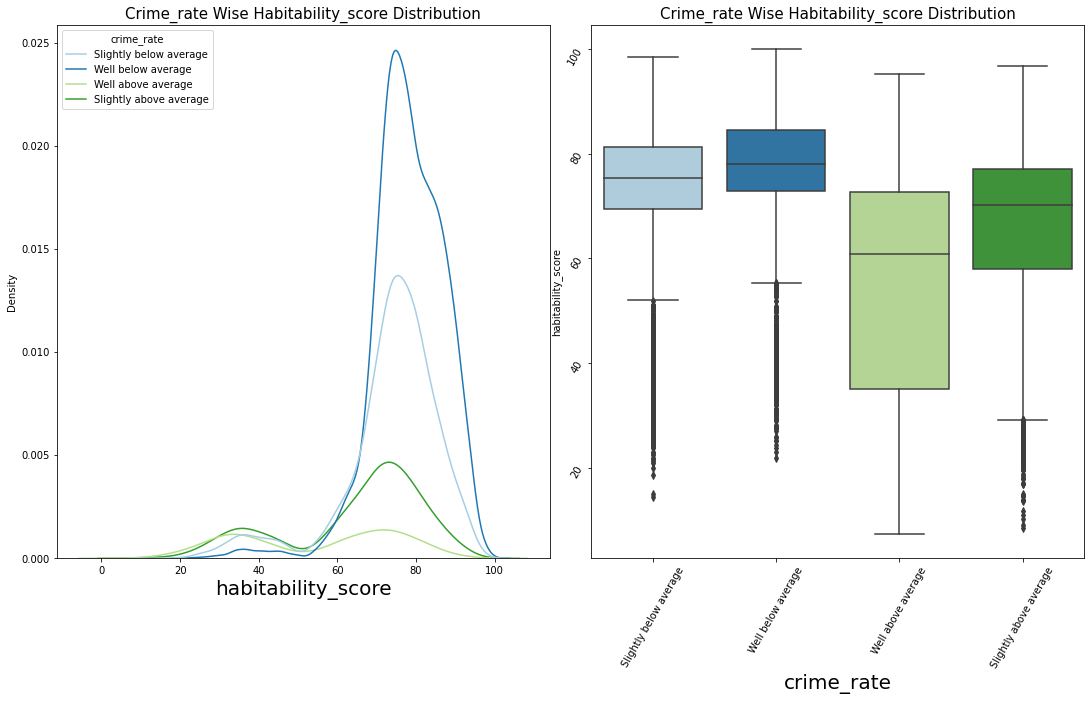

In [ ]:
side_by_side_plot(train,'crime_rate','habitability_score',rot=60)

In [ ]:
group_summary(train,'crime_rate','habitability_score')

,crime_rate,count,mean,std,min,25%,50%,75%,max
3,Well below average,19472.0,78.013276,9.216776,21.78,72.8000,77.96,84.4725,100.00
1,Slightly below average,11580.0,73.556079,12.638285,14.40,69.4775,75.44,81.2225,98.52
0,Slightly above average,5303.0,64.952978,17.459247,8.52,57.9400,70.12,77.1400,96.74
2,Well above average,2357.0,55.011052,20.419591,7.28,35.0900,60.76,72.7600,95.30


#### The above plot explains that there is a significant difference between the habitability score and the crime rate category.

#### The property which is in the slightly above average and well above average crime rate categories has a low habitability score. 


### Let's see the crime rate category of different properties.

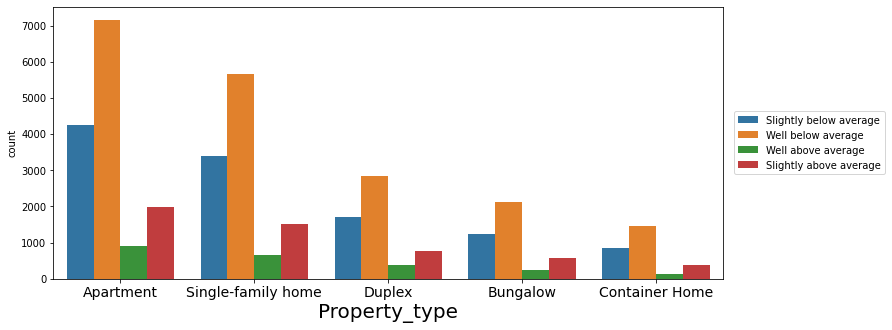

In [ ]:
grp_count_plot(train,'property_type','crime_rate',size=(12,5))

In [ ]:
group_by_perc(train,'property_type','crime_rate',sortby='property_type',sort=True)

,property_type,crime_rate,count,percentage
0,Apartment,Slightly above average,1974,5.17
1,Apartment,Slightly below average,4255,11.14
2,Apartment,Well above average,901,2.36
3,Apartment,Well below average,7160,18.74
4,Bungalow,Slightly above average,573,1.50
5,Bungalow,Slightly below average,1248,3.27
6,Bungalow,Well above average,236,0.62
7,Bungalow,Well below average,2111,5.52
11,Container Home,Well below average,1453,3.80
10,Container Home,Well above average,140,0.37


#### The above plot and summary explain that the crime rate count is almost similar in all property types.

### Let's the habitability score by different properties and various crime rates of the properties.

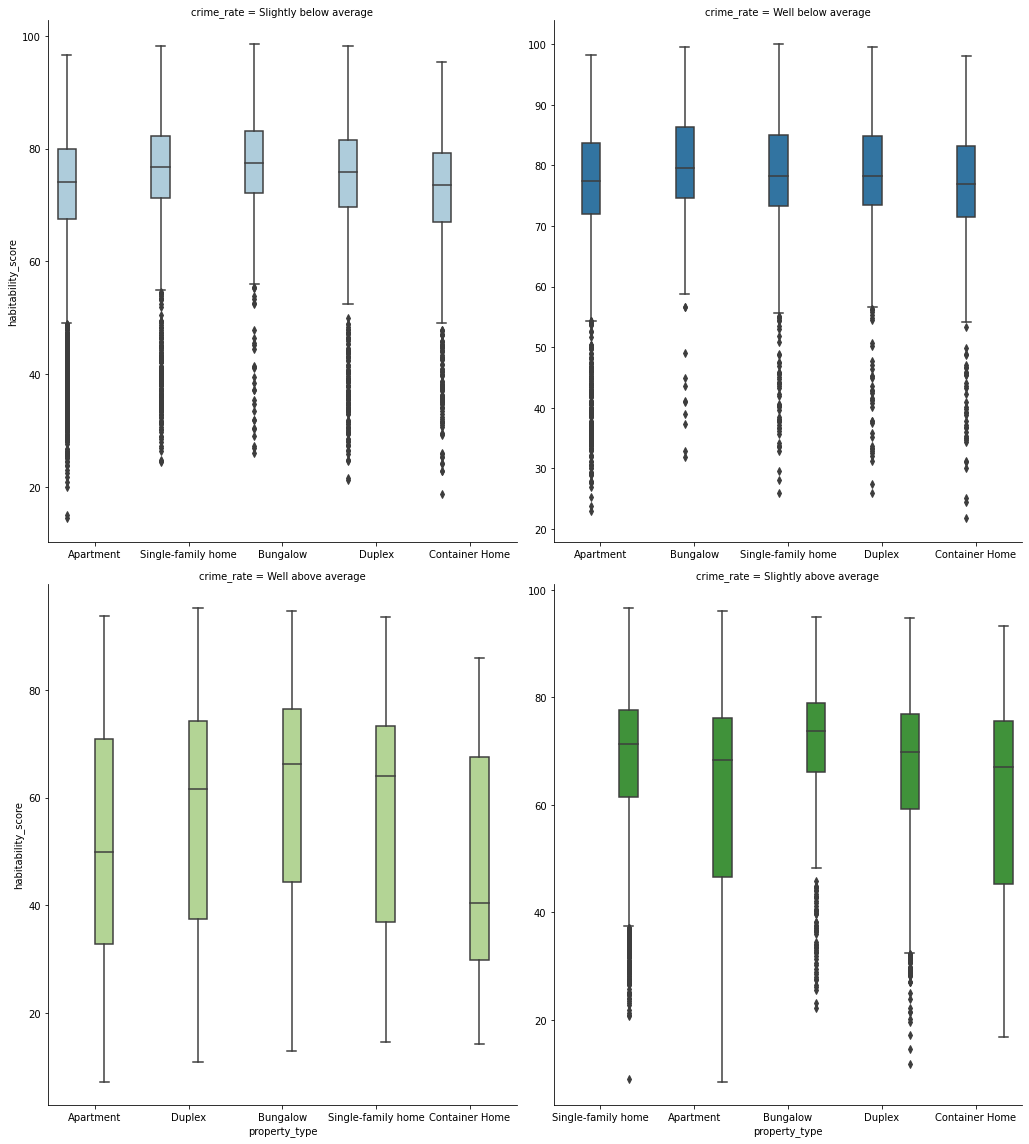

In [ ]:
sns.catplot(data=train, x="property_type", y="habitability_score",hue='crime_rate',
           col='crime_rate',col_wrap=2,sharex=False,sharey=False,palette='Paired',
            kind='box',height=8,aspect=.9);


In [ ]:
group_summary(train,['property_type','crime_rate'],'habitability_score')

,property_type,crime_rate,count,mean,std,min,25%,50%,75%,max
7,Bungalow,Well below average,2111.0,80.214893,8.217482,31.87,74.6050,79.560,86.3500,99.59
19,Single-family home,Well below average,5656.0,78.731764,8.408894,25.87,73.2700,78.165,85.0825,100.00
15,Duplex,Well below average,2836.0,78.392786,8.793674,25.90,73.4200,78.250,84.7825,99.45
3,Apartment,Well below average,7160.0,76.957260,9.893065,22.94,71.9600,77.395,83.7025,98.18
5,Bungalow,Slightly below average,1248.0,76.834712,9.662954,26.05,72.0950,77.430,83.1300,98.52
11,Container Home,Well below average,1453.0,76.484026,10.131763,21.78,71.4000,76.990,83.2000,98.01
17,Single-family home,Slightly below average,3391.0,75.412430,11.249936,24.44,71.1700,76.700,82.2350,98.12
13,Duplex,Slightly below average,1708.0,73.856265,12.928402,21.19,69.6150,75.765,81.5000,98.19
1,Apartment,Slightly below average,4255.0,71.583866,13.569757,14.40,67.5000,74.120,79.8600,96.56
9,Container Home,Slightly below average,840.0,70.636190,13.904801,18.63,66.8750,73.480,79.2125,95.41


#### The above plot and summary explain that the slightly above average and well above average crime rate categories of properties have low habitability scores.


### Let's see the quantity of dust and noise in the neighborhood.

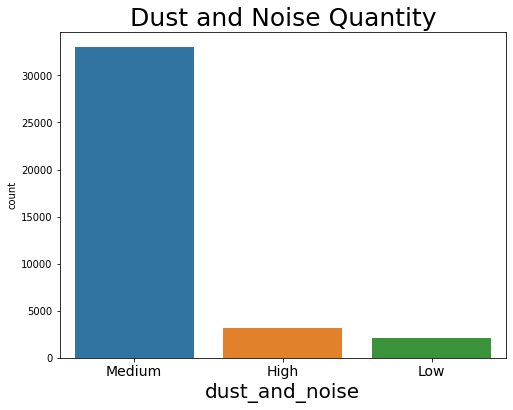

In [ ]:
count_plot(train,'dust_and_noise' ,title='Dust and Noise Quantity')

In [ ]:
train['dust_and_noise'].value_counts()

Medium    32996
High       3212
Low        2072
Name: dust_and_noise, dtype: int64

#### The above plot explains that most of the neighborhood has a medium quantity of dust and noise.

### Let's see the habitability score by the neighborhood's dust and noise quantity.

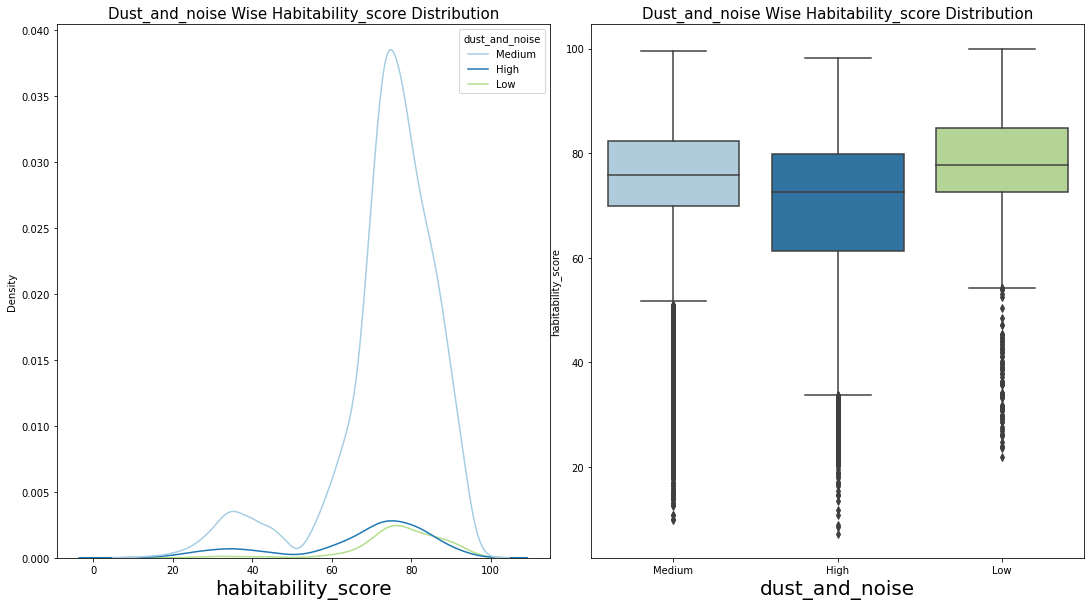

In [ ]:
side_by_side_plot(train,'dust_and_noise','habitability_score')

In [ ]:
group_summary(train,'dust_and_noise','habitability_score')

,dust_and_noise,count,mean,std,min,25%,50%,75%,max
1,Low,2072.0,77.115536,11.789961,21.91,72.5675,77.82,84.7425,100.00
2,Medium,32996.0,73.868511,13.602032,9.94,69.9600,75.89,82.3500,99.59
0,High,3212.0,67.291600,18.228357,7.28,61.4000,72.57,79.8650,98.30


#### The above plot explains that there is a significant difference between the habitability score and the quantity of dust and noise.


### Let's see the quantity of dust and noise in the neighborhood by different property.

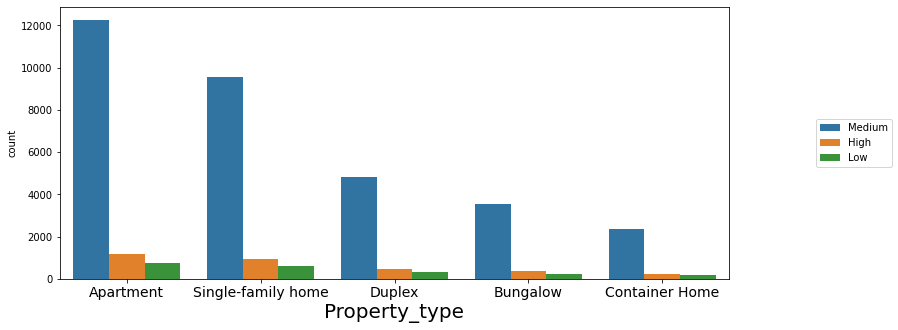

In [ ]:
grp_count_plot(train,'property_type','dust_and_noise',size=(12,5))

In [ ]:
group_by_perc(train,'property_type','dust_and_noise',sortby='property_type',sort=True)

,property_type,dust_and_noise,count,percentage
0,Apartment,High,1160,3.07
1,Apartment,Low,738,1.95
2,Apartment,Medium,12259,32.44
3,Bungalow,High,361,0.96
4,Bungalow,Low,229,0.61
5,Bungalow,Medium,3525,9.33
6,Container Home,High,245,0.65
7,Container Home,Low,163,0.43
8,Container Home,Medium,2373,6.28
9,Duplex,High,472,1.25


#### The above plot and summary explain that the quantity of dust and noise in the neighborhood is almost similar in all property types.

### Let's see the habitability score by different properties and the quantity of the neighborhood's dust and noise.

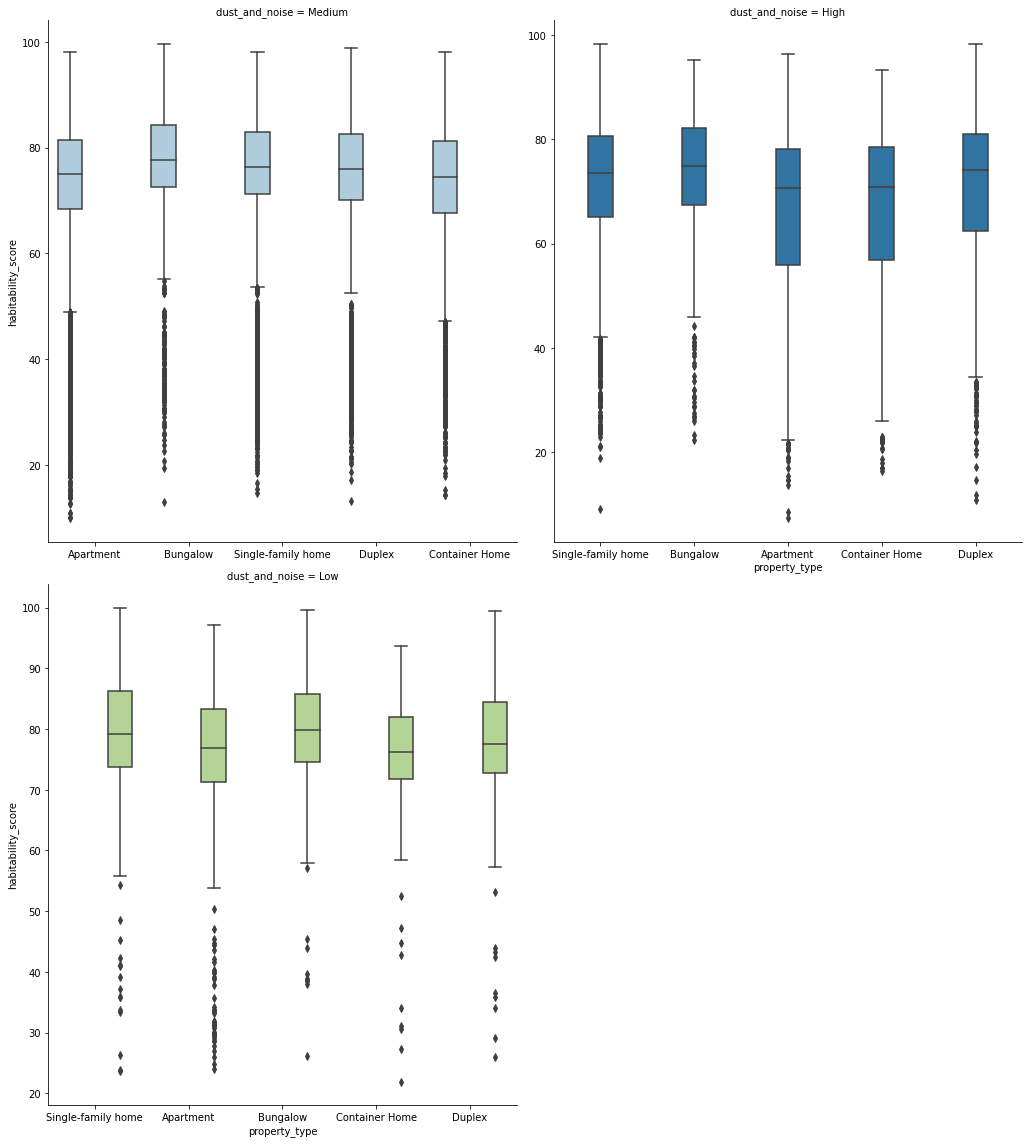

In [ ]:
sns.catplot(data=train, x="property_type", y="habitability_score",hue='dust_and_noise',
           col='dust_and_noise',col_wrap=2,sharex=False,sharey=False,palette='Paired',
            kind='box',height=8,aspect=.9);

In [ ]:
group_summary(train,['property_type','dust_and_noise'],'habitability_score')

,property_type,dust_and_noise,count,mean,std,min,25%,50%,75%,max
13,Single-family home,Low,604.0,79.150215,10.468343,23.68,73.7175,79.225,86.2350,100.00
4,Bungalow,Low,229.0,78.816201,11.009014,26.12,74.6500,79.930,85.8100,99.55
10,Duplex,Low,318.0,77.618208,10.844374,26.05,72.7125,77.525,84.4700,99.45
5,Bungalow,Medium,3525.0,77.243047,11.062145,13.03,72.5100,77.750,84.2100,99.59
1,Apartment,Low,738.0,75.257317,12.987278,24.07,71.2425,76.815,83.3400,97.09
14,Single-family home,Medium,9573.0,75.149137,12.428029,14.62,71.1700,76.420,82.9300,98.12
7,Container Home,Low,163.0,74.913067,12.024315,21.91,71.8250,76.170,81.9600,93.61
11,Duplex,Medium,4837.0,73.975783,13.510793,13.16,70.0600,75.970,82.5500,98.87
3,Bungalow,High,361.0,72.526565,14.593634,22.32,67.4400,74.890,82.2400,95.17
2,Apartment,Medium,12259.0,72.265749,14.591722,9.94,68.4050,74.960,81.4200,98.18


#### The above plot and summary explain that when the quantity of dust and noise in the neighborhood is low then those properties have a high habitability score.


### Let's see the air quality index distribution in the neighborhood.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


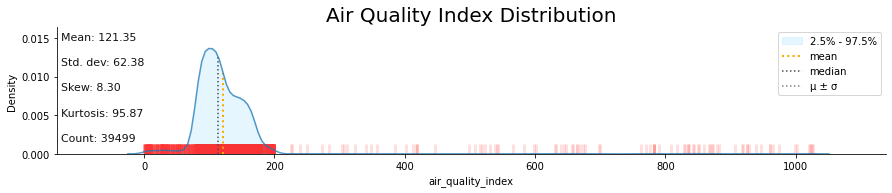

In [ ]:
klib.dist_plot(train['air_quality_index']);
plt.title("Air Quality Index Distribution",fontsize=20);

In [ ]:
train['air_quality_index'].describe()

count    39499.000000
mean       121.352566
std         62.384669
min          0.000000
25%         95.000000
50%        113.000000
75%        140.000000
max       1044.000000
Name: air_quality_index, dtype: float64

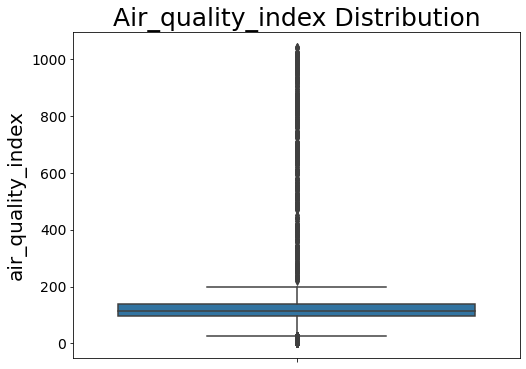

In [ ]:
box_plot(train,'air_quality_index',rot=90)

#### The above histogram explains that the air quality index column is positively skewed(mean>median).

### The air quality index ranges from 0 to 1044.

### The average traffic density score is 121.3.

#### The boxplot explains that there are outliers above the third quartile and below the first quartile.

### Let's see the air quality index of different types of property.

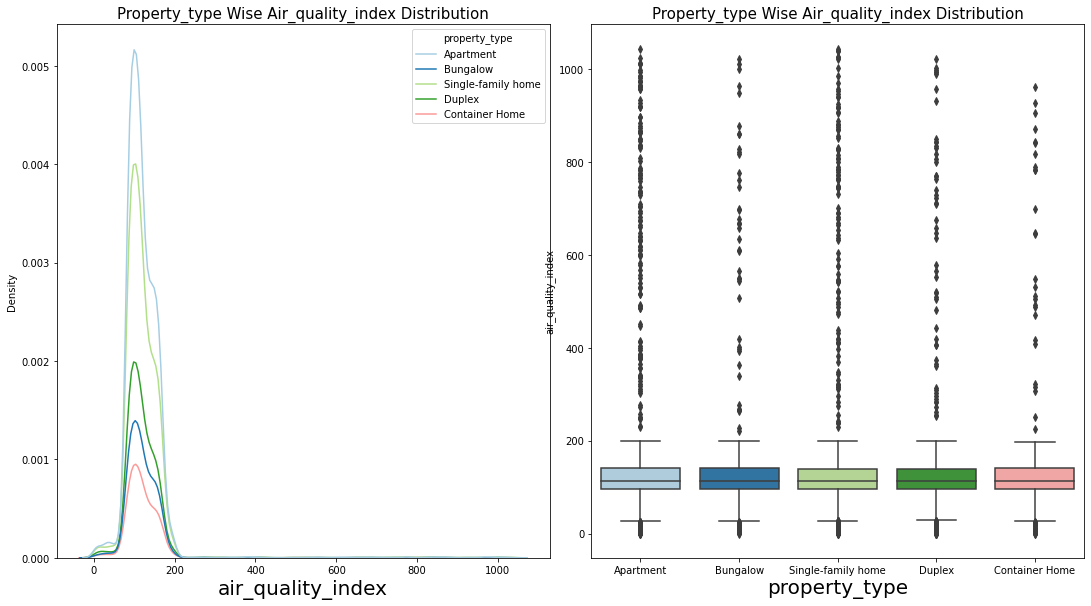

In [ ]:
side_by_side_plot(train,'property_type','air_quality_index')

In [ ]:
group_summary(train,'property_type','air_quality_index')

,property_type,count,mean,std,min,25%,50%,75%,max
1,Bungalow,4238.0,121.844030,61.940049,0.0,95.0,114.0,141.0,1022.0
0,Apartment,14596.0,121.510071,62.292796,0.0,95.0,113.0,141.0,1044.0
4,Single-family home,11477.0,121.347913,63.813014,0.0,95.0,113.0,140.0,1043.0
2,Container Home,2872.0,121.037604,60.524153,0.0,95.0,113.0,141.0,961.0
3,Duplex,5806.0,120.797968,61.622132,0.0,95.0,113.0,139.0,1022.0


#### The above summary and plot explain that the mean air quality index is almost similar in all types of property.



### Let's see if is there any relationship between the air quality index and habitability score by different property types.

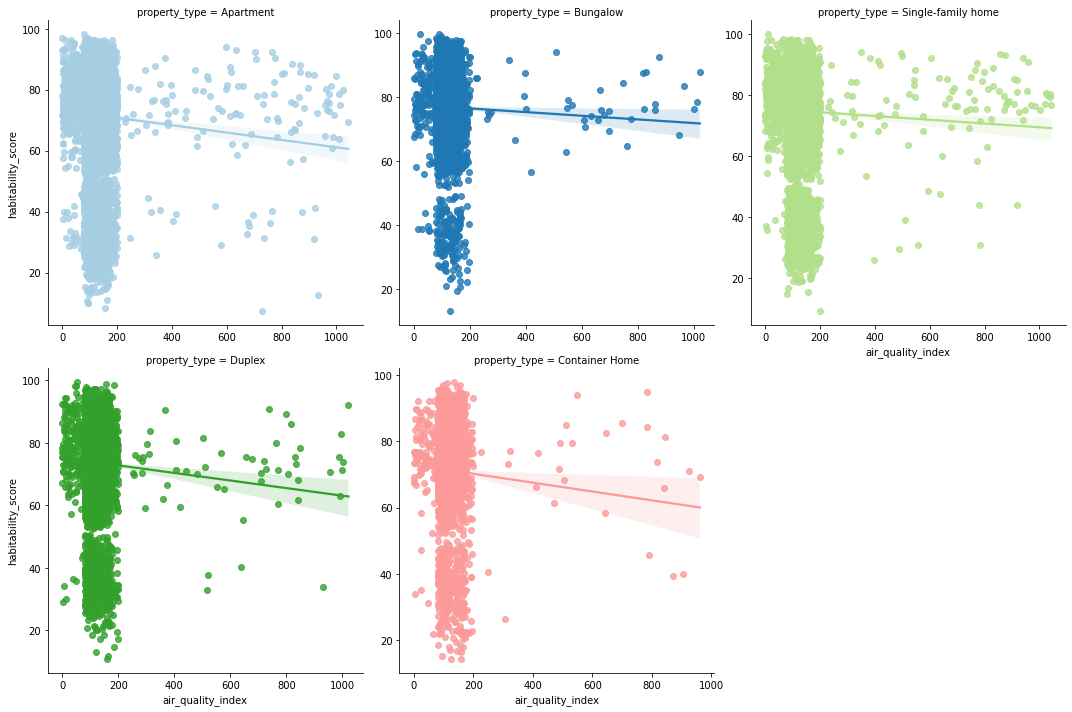

In [ ]:
sns.lmplot(data=train, x="air_quality_index", y="habitability_score",hue='property_type',
           col='property_type',col_wrap=3,sharex=False,sharey=False,palette='Paired');


#### The above linear model plot explains that there is a negative relationship between the air quality index and habitability score.

### Let's see the distribution average review ratings that have been given by the neighborhood.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


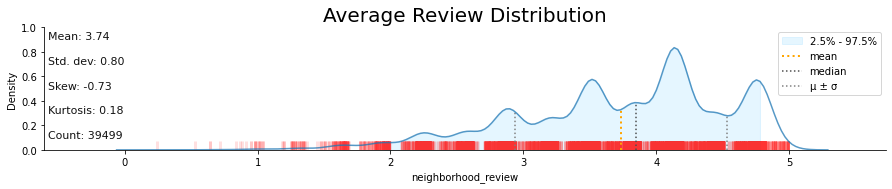

In [ ]:
klib.dist_plot(train['neighborhood_review']);
plt.title("Average Review Distribution",fontsize=20);

In [ ]:
train['neighborhood_review'].describe()

count    39499.000000
mean         3.735945
std          0.796843
min          0.000000
25%          3.220000
50%          3.850000
75%          4.260000
max          5.000000
Name: neighborhood_review, dtype: float64

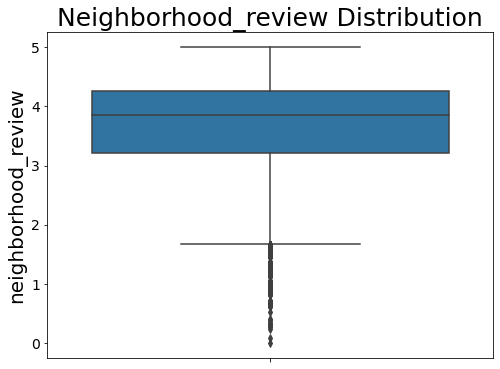

In [ ]:
box_plot(train,'neighborhood_review',rot=90)

#### The above histogram explains that the average neighborhood review rating column is negatively skewed(mean<median).

### The average neighborhood review rating ranges from 0 to 5.

### The average of average neighborhood review rating is 3.74.

#### The boxplot explains that there are outliers below the first quartile.

### Let's see the average review ratings of different types of property.

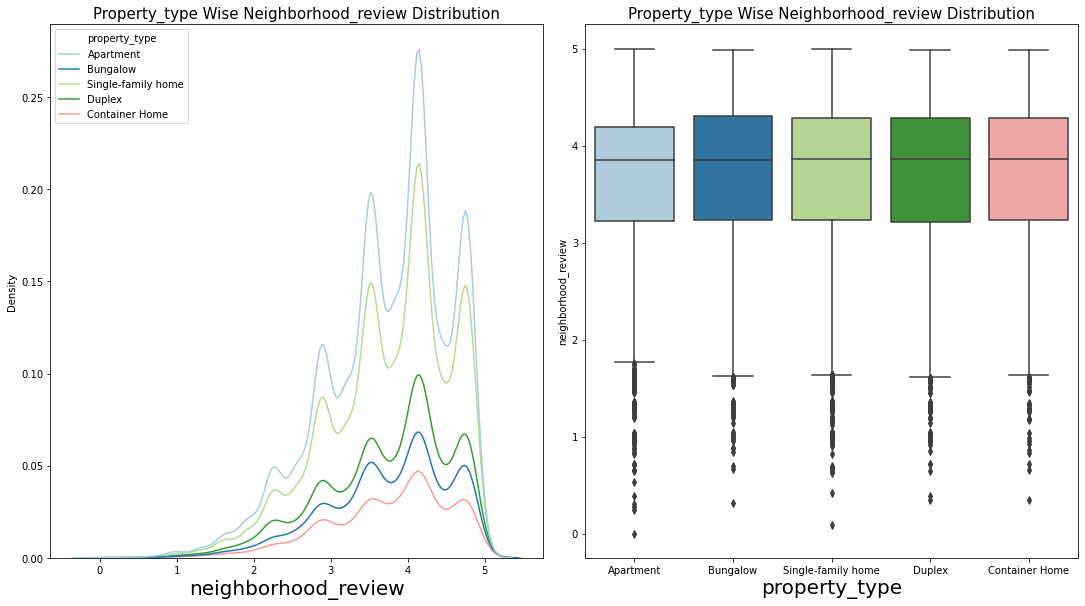

In [ ]:
side_by_side_plot(train,'property_type','neighborhood_review')

In [ ]:
group_summary(train,'property_type','neighborhood_review')

,property_type,count,mean,std,min,25%,50%,75%,max
2,Container Home,2872.0,3.754519,0.787552,0.35,3.23,3.86,4.29,4.99
1,Bungalow,4238.0,3.747881,0.790565,0.31,3.23,3.85,4.31,4.99
4,Single-family home,11477.0,3.743920,0.793936,0.09,3.23,3.86,4.29,5.00
3,Duplex,5806.0,3.726452,0.814070,0.35,3.21,3.86,4.28,4.99
0,Apartment,14596.0,3.726017,0.796425,0.00,3.22,3.85,4.19,5.00


#### The above summary and plot explain that the mean of average neighborhood review ratings is almost similar in all types of property.



### Let's see if is there any relationship between the average review ratings and habitability score by different property types.

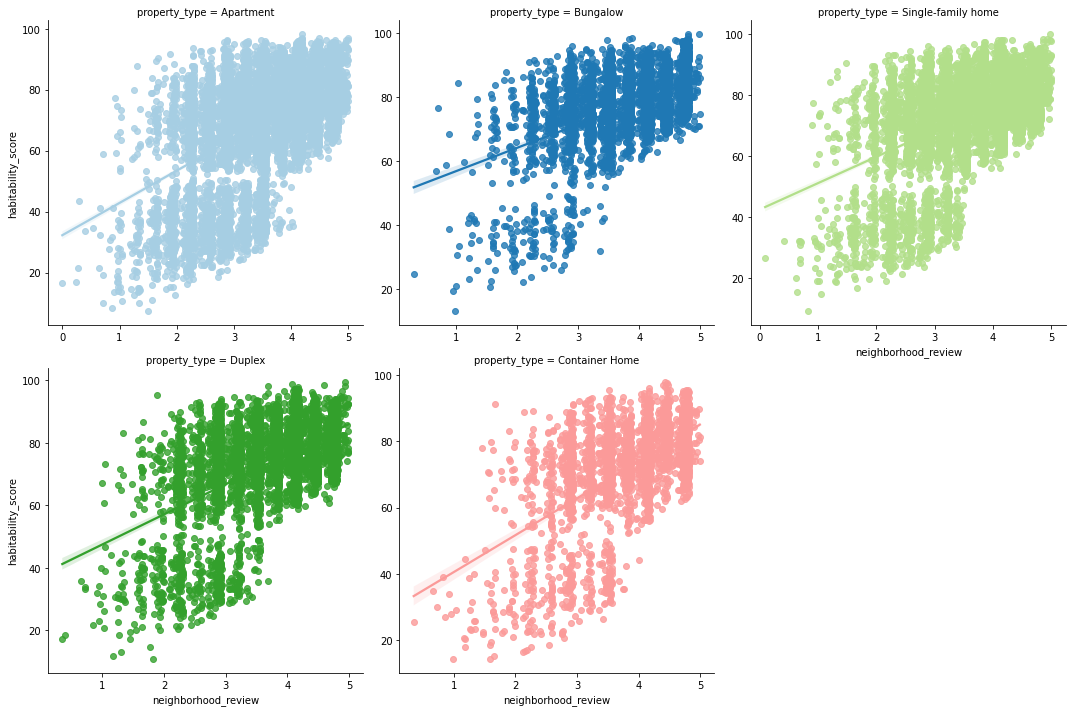

In [ ]:
sns.lmplot(data=train, x="neighborhood_review", y="habitability_score",hue='property_type',
           col='property_type',col_wrap=3,sharex=False,sharey=False,palette='Paired');


#### The above linear model plot explains that there is a positive relationship between the average review rating and habitability score.

### Let's see the correlation between the numerical columns.

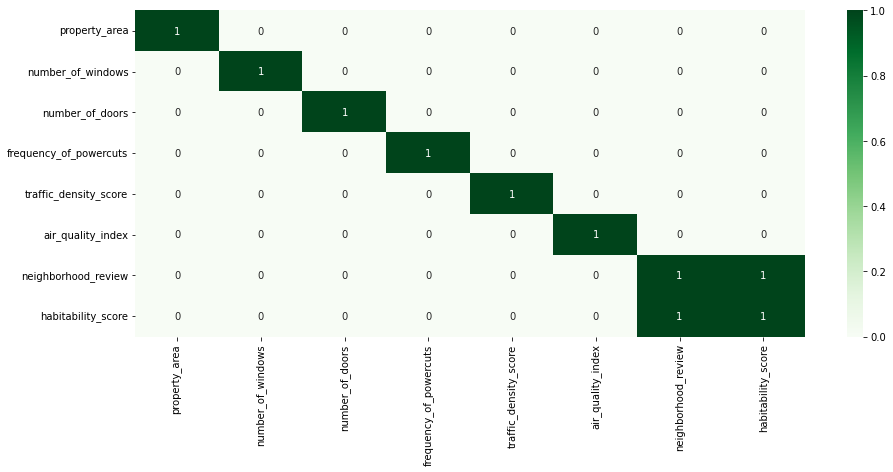

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(train.select_dtypes(exclude='object').corr()>0.4,annot=True, fmt='.1g',cmap='Greens',);

#### The above heatmap explains that there is a positive correlation between the neighborhood's review rating and habitability score.